In [10]:
import numpy as np

import pandas as pd

apple=pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_AAPL.csv")
apple=apple.iloc[:453,0]
bac=pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_BAC.csv")
bac=bac.iloc[:,0]
tm=pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_TM.csv")
tm=tm.iloc[:,0]
pfe=pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_PFE.csv")
pfe=pfe.iloc[:,0]
xom=pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_XOM.csv")
xom=xom.iloc[:,0]

mar=pd.read_csv("MarketIndex.csv")
mar=mar.iloc[:453,6]

#Standard Deviations of the predicted stocks

stdAPPL=np.std(apple)
stdBAC=np.std(bac)
stdPFE=np.std(pfe)
stdTM=np.std(tm)
stdXOM=np.std(xom)

In [11]:
mar

0      92.656088
1      92.680466
2      92.707005
3      92.738306
4      92.766713
         ...    
448    96.500963
449    96.479704
450    96.464470
451    96.463432
452    96.459573
Name: Market, Length: 453, dtype: float64

Correlation between all stocks and the market taken two at a time

In [12]:
import numpy as np

capplebac=np.corrcoef(apple,bac)

capplepfe=np.corrcoef(apple,pfe)

capplepg=np.corrcoef(apple,tm)

capplexom=np.corrcoef(apple,xom)

cbacpfe=np.corrcoef(bac,pfe)

cbacpg=np.corrcoef(bac,tm)

cbacxom=np.corrcoef(bac,xom)

cpfepg=np.corrcoef(pfe,tm)

cpfexom=np.corrcoef(pfe,xom)

cpgxom=np.corrcoef(tm,xom)

#Covariance of stocks as two

coapplebac=np.cov(apple,bac)

coapplepfe=np.cov(apple,pfe)

coapplepg=np.cov(apple,tm)

coapplexom=np.cov(apple,xom)

cobacpfe=np.cov(bac,pfe)

cobacpg=np.cov(bac,tm)

cobacxom=np.cov(bac,xom)

copfepg=np.cov(pfe,tm)

copfexom=np.cov(pfe,xom)

copgxom=np.cov(tm,xom)

#Covariance with market

coapplemar=np.cov(apple,mar)
cobacmar=np.cov(bac,mar)
copfemar=np.cov(pfe,mar)
copgmar=np.cov(tm,mar)
coxommar=np.cov(xom,mar)

print(cpgxom)

[[1.         0.82976086]
 [0.82976086 1.        ]]


In [13]:
##Correlations based on the correlation matrix

capplebac=0.896

capplepfe=0.908

capplepg=0.081

capplexom=0.38

cbacpfe=0.805

cbacpg=-0.07

cbacxom=0.387

cpfepg=0.263

cpfexom=0.571

cpgxom=0.182



**Expected returns of stocks and market**

In [15]:
betaapple=coapplemar/1.45669964  #each stock beta value
betabac=cobacmar/1.45669964 
betapfe=copfemar/1.45669964
betapg=copgmar/1.45669964  
betaxom=coxommar/1.45669964
# betaapple=1.2
# betabac=1.24
# betapfe=0.71
# betapg=0.58
# betaxom=1.04

In [16]:
#expectedreturnof a stock using CAPM //risk free rate = 3%
#expected return of market=((ending value/initial value)^(1/2))-1
#expected return of each stock=3+betastock(expected return of market-3)  // we willl ge expected return of each stock 
expmarket=(np.sqrt(mar[len(mar)-1]/mar[0]))-1

expapple=3+betaapple*(expmarket-3)
exppfe=3+betapfe*(expmarket-3)
expbac=3+betabac*(expmarket-3)
exppg=3+betapg*(expmarket-3)
expxom=3+betaxom*(expmarket-3)

# expmarket=17.3
# expapple=6.25
# exppg=17
# exppfe=7
# expbac=42
# expxom=14.25
expmarket


0.020318323396515847

Standard deviation of portfolio // Risk

In [18]:

import numpy as np

# w1=0
# w2=0
# w3=0
# w4=0
# w5=1

df=pd.DataFrame({"w1":0,"w2":0,"w3":0,"w4":0,"w5":0,"sigport":0,"retport":0},index=[0]) 

for w1 in np.arange(0, 1, 0.05):
  for w2 in np.arange(0, 1, 0.05):
    for w3 in np.arange(0, 1, 0.05):
      for w4 in np.arange(0, 1, 0.05):
        for w5 in np.arange(0, 1, 0.05):
          if(w1+w2+w3+w4+w5==1):
            term1 = w1*w1*stdAPPL*stdAPPL
            term2 = w2*w2*stdBAC*stdBAC
            term3 = w3*w3*stdPFE*stdPFE
            term4 = w4*w4*stdTM*stdTM
            term5 = w5*w5*stdXOM*stdXOM
            term6 = 2 * w1 * w2 * capplebac * stdAPPL * stdBAC
            term7 = 2 * w1 * w3 * capplepfe * stdAPPL * stdPFE
            term8 = 2 * w1 * w4 * capplepg * stdAPPL * stdTM
            term9 = 2 * w1 * w5 * capplexom * stdAPPL * stdXOM
            term10 = 2 * w2 * w3 * cbacpfe * stdBAC * stdPFE
            term11 = 2 * w2 * w4 * cbacpg * stdBAC * stdTM
            term12 = 2 * w2 * w5 * cbacxom * stdBAC * stdXOM
            term13 = 2 * w3 * w4 * cpfepg * stdPFE * stdTM
            term14 = 2 * w3 * w5 * cpfexom * stdPFE * stdXOM
            term15 = 2 * w4 * w5 * cpgxom * stdTM * stdXOM


            sigport=np.sqrt(term1+term2+term3+term4+term5+term6+term7+term8+term9+term10+term11+term12+term13+term14+term15)
            retport=w1*expapple+w2*expbac+w3*exppfe+w4*exppg+w5*expxom
            # df.append({"w1":w1,"w2":w2,"w3":w3,"w4":w4,"w5":w5,"sigport":sigport,"retport":retport},ignore_index=True)
            df.loc[len(df.index)] = [w1,w2,w3,w4,w5,sigport,retport]




            print(w1,w2,w3,w4,w5)
            print(sigport,retport)
            print("break")


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


0.0 0.0 0.0 0.05 0.9500000000000001
9.612363290066542 [[-236.20482867  -16.89167333]
 [ -16.89167333   -0.66860126]]
break
0.0 0.0 0.0 0.1 0.9
9.514766168616838 [[-276.92454006  -18.67512801]
 [ -18.67512801   -0.66860126]]
break
0.0 0.0 0.0 0.15000000000000002 0.8500000000000001
9.550940538781418 [[-317.64425146  -20.45858269]
 [ -20.45858269   -0.66860126]]
break
0.0 0.0 0.0 0.2 0.8
9.71939287280163 [[-358.36396285  -22.24203737]
 [ -22.24203737   -0.66860126]]
break
0.0 0.0 0.0 0.25 0.75
10.01344961364674 [[-399.08367425  -24.02549205]
 [ -24.02549205   -0.66860126]]
break
0.0 0.0 0.0 0.30000000000000004 0.7000000000000001
10.422484887149663 [[-439.80338564  -25.80894673]
 [ -25.80894673   -0.66860126]]
break
0.0 0.0 0.0 0.35000000000000003 0.65
10.933601967756568 [[-480.52309704  -27.59240141]
 [ -27.59240141   -0.66860126]]
break
0.0 0.0 0.0 0.4 0.6000000000000001
11.533236989867307 [[-521.24280843  -29.37585609]
 [ -29.37585609   -0.66860126]]
break
0.0 0.0 0.0 0.45 0.55
12.20835

0.0 0.0 0.45 0.5 0.05
12.284687140379663 [[-547.76736299  -29.85671757]
 [ -29.85671757   -0.66860126]]
break
0.0 0.0 0.45 0.55 0.0
13.216766298642977 [[-588.48707439  -31.64017225]
 [ -31.64017225   -0.66860126]]
break
0.0 0.0 0.5 0.0 0.5
7.11927308794972 [[-134.46859701  -11.67927655]
 [ -11.67927655   -0.66860126]]
break
0.0 0.0 0.5 0.05 0.45
7.012917453507564 [[-175.18830841  -13.46273124]
 [ -13.46273124   -0.66860126]]
break
0.0 0.0 0.5 0.1 0.4
7.087624131347751 [[-215.9080198   -15.24618592]
 [ -15.24618592   -0.66860126]]
break
0.0 0.0 0.5 0.15000000000000002 0.35000000000000003
7.3378650269312695 [[-256.6277312   -17.0296406 ]
 [ -17.0296406    -0.66860126]]
break
0.0 0.0 0.5 0.2 0.30000000000000004
7.746647867839689 [[-297.34744259  -18.81309528]
 [ -18.81309528   -0.66860126]]
break
0.0 0.0 0.5 0.25 0.25
8.290554018387159 [[-338.06715399  -20.59654996]
 [ -20.59654996   -0.66860126]]
break
0.0 0.0 0.5 0.30000000000000004 0.2
8.94496849541304 [[-378.78686538  -22.38000464]
 [

0.0 0.05 0.25 0.25 0.45
8.735421328001836 [[-366.05878575  -22.40465146]
 [ -22.40465146   -0.66860126]]
break
0.0 0.05 0.25 0.30000000000000004 0.4
9.283520703284914 [[-406.77849714  -24.18810614]
 [ -24.18810614   -0.66860126]]
break
0.0 0.05 0.25 0.35000000000000003 0.35000000000000003
9.93057753746357 [[-447.49820854  -25.97156082]
 [ -25.97156082   -0.66860126]]
break
0.0 0.05 0.25 0.4 0.30000000000000004
10.658584639410547 [[-488.21791993  -27.7550155 ]
 [ -27.7550155    -0.66860126]]
break
0.0 0.05 0.25 0.45 0.25
11.452114455943367 [[-528.93763133  -29.53847018]
 [ -29.53847018   -0.66860126]]
break
0.0 0.05 0.25 0.5 0.2
12.298490444653021 [[-569.65734272  -31.32192486]
 [ -31.32192486   -0.66860126]]
break
0.0 0.05 0.25 0.55 0.15000000000000002
13.187541530970146 [[-610.37705412  -33.10537954]
 [ -33.10537954   -0.66860126]]
break
0.0 0.05 0.25 0.65 0.05
15.063112181242039 [[-6.91816477e+02 -3.66722889e+01]
 [-3.66722889e+01 -6.68601262e-01]]
break
0.0 0.05 0.25 0.7000000000000

0.0 0.1 0.1 0.6000000000000001 0.2
14.092233373633142 [[-666.88509322  -36.0111473 ]
 [ -36.0111473    -0.66860126]]
break
0.0 0.1 0.1 0.65 0.15000000000000002
15.018100352088798 [[-7.07604805e+02 -3.77946020e+01]
 [-3.77946020e+01 -6.68601262e-01]]
break
0.0 0.1 0.1 0.75 0.05
16.94453480530781 [[-7.89044227e+02 -4.13615113e+01]
 [-4.13615113e+01 -6.68601262e-01]]
break
0.0 0.1 0.1 0.8 0.0
17.93708127379413 [[-8.29763939e+02 -4.31449660e+01]
 [-4.31449660e+01 -6.68601262e-01]]
break
0.0 0.1 0.15000000000000002 0.0 0.75
8.357809948306839 [[-172.14690445  -14.26679692]
 [ -14.26679692   -0.66860126]]
break
0.0 0.1 0.15000000000000002 0.05 0.7000000000000001
8.149845832662422 [[-212.86661585  -16.0502516 ]
 [ -16.0502516    -0.66860126]]
break
0.0 0.1 0.15000000000000002 0.1 0.65
8.095889683596202 [[-253.58632724  -17.83370628]
 [ -17.83370628   -0.66860126]]
break
0.0 0.1 0.15000000000000002 0.15000000000000002 0.6000000000000001
8.198982568001952 [[-294.30603864  -19.61716096]
 [ -19.61

0.0 0.15000000000000002 0.0 0.0 0.8500000000000001
8.934980824862347 [[-187.93523216  -15.38911   ]
 [ -15.38911      -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.05 0.8
8.693785665758217 [[-228.65494355  -17.17256468]
 [ -17.17256468   -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.1 0.75
8.595718630357464 [[-269.37465495  -18.95601936]
 [ -18.95601936   -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.15000000000000002 0.7000000000000001
8.645651568913232 [[-310.09436634  -20.73947404]
 [ -20.73947404   -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.2 0.65
8.84107719898856 [[-350.81407774  -22.52292872]
 [ -22.52292872   -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.25 0.6000000000000001
9.1727010054043 [[-391.53378913  -24.3063834 ]
 [ -24.3063834    -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.30000000000000004 0.55
9.626457507269265 [[-432.25350053  -26.08983808]
 [ -26.08983808   -0.66860126]]
break
0.0 0.15000000000000002 0.0 0.35000000000000003 0.5
10.18603

0.0 0.2 0.05 0.05 0.7000000000000001
8.164772990976875 [[-220.03666316  -16.92330092]
 [ -16.92330092   -0.66860126]]
break
0.0 0.2 0.05 0.1 0.65
8.08189813220755 [[-260.75637455  -18.7067556 ]
 [ -18.7067556    -0.66860126]]
break
0.0 0.2 0.05 0.15000000000000002 0.6000000000000001
8.156413400093234 [[-301.47608595  -20.49021028]
 [ -20.49021028   -0.66860126]]
break
0.0 0.2 0.05 0.2 0.55
8.384123352844178 [[-342.19579734  -22.27366496]
 [ -22.27366496   -0.66860126]]
break
0.0 0.2 0.05 0.25 0.5
8.753080140547087 [[-382.91550874  -24.05711964]
 [ -24.05711964   -0.66860126]]
break
0.0 0.2 0.05 0.30000000000000004 0.45
9.246390766489304 [[-423.63522013  -25.84057433]
 [ -25.84057433   -0.66860126]]
break
0.0 0.2 0.05 0.35000000000000003 0.4
9.845380397681117 [[-464.35493153  -27.62402901]
 [ -27.62402901   -0.66860126]]
break
0.0 0.2 0.05 0.4 0.35000000000000003
10.532033557301014 [[-505.07464292  -29.40748369]
 [ -29.40748369   -0.66860126]]
break
0.0 0.2 0.05 0.45 0.30000000000000004

0.0 0.25 0.15000000000000002 0.0 0.6000000000000001
7.696317326557659 [[-164.59701934  -14.54768827]
 [ -14.54768827   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.05 0.55
7.481411812092326 [[-205.31673073  -16.33114295]
 [ -16.33114295   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.1 0.5
7.434123197916729 [[-246.03644213  -18.11459763]
 [ -18.11459763   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.15000000000000002 0.45
7.55759852401137 [[-286.75615352  -19.89805232]
 [ -19.89805232   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.2 0.4
7.843777526620709 [[-327.47586492  -21.681507  ]
 [ -21.681507     -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.25 0.35000000000000003
8.27579839246628 [[-368.19557631  -23.46496168]
 [ -23.46496168   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.30000000000000004 0.30000000000000004
8.83228593779781 [[-408.91528771  -25.24841636]
 [ -25.24841636   -0.66860126]]
break
0.0 0.25 0.15000000000000002 0.35000000000000003 0.2

10.10290850683476 [[-481.7364301   -28.56606196]
 [ -28.56606196   -0.66860126]]
break
0.0 0.30000000000000004 0.2 0.45 0.05
10.93652660275414 [[-522.4561415   -30.34951664]
 [ -30.34951664   -0.66860126]]
break
0.0 0.30000000000000004 0.2 0.5 0.0
11.819598583567462 [[-563.17585289  -32.13297132]
 [ -32.13297132   -0.66860126]]
break
0.0 0.30000000000000004 0.25 0.0 0.45
7.15334433754582 [[-149.87708691  -13.95553031]
 [ -13.95553031   -0.66860126]]
break
0.0 0.30000000000000004 0.25 0.05 0.4
6.967758830286568 [[-190.59679831  -15.73898499]
 [ -15.73898499   -0.66860126]]
break
0.0 0.30000000000000004 0.25 0.1 0.35000000000000003
6.963148262906668 [[-231.3165097   -17.52243967]
 [ -17.52243967   -0.66860126]]
break
0.0 0.30000000000000004 0.25 0.15000000000000002 0.30000000000000004
7.139863237769331 [[-272.0362211   -19.30589435]
 [ -19.30589435   -0.66860126]]
break
0.0 0.30000000000000004 0.25 0.2 0.25
7.485072016054746 [[-312.75593249  -21.08934903]
 [ -21.08934903   -0.66860126]]


0.0 0.35000000000000003 0.1 0.1 0.45
7.3043888929281175 [[-247.10483741  -18.64475274]
 [ -18.64475274   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.15000000000000002 0.4
7.418041339821343 [[-287.82454881  -20.42820743]
 [ -20.42820743   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.25 0.30000000000000004
8.126693416486821 [[-369.2639716   -23.99511679]
 [ -23.99511679   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.30000000000000004 0.25
8.682494700929873 [[-409.98368299  -25.77857147]
 [ -25.77857147   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.35000000000000003 0.2
9.342629463187894 [[-450.70339439  -27.56202615]
 [ -27.56202615   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.4 0.15000000000000002
10.086633682741917 [[-491.42310578  -29.34548083]
 [ -29.34548083   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.5 0.05
11.760969972861789 [[-572.86252857  -32.91239019]
 [ -32.91239019   -0.66860126]]
break
0.0 0.35000000000000003 0.1 0.55 0.0
12.666696356662

0.0 0.4 0.05 0.05 0.5
7.421074163517518 [[-209.97014967  -17.29782272]
 [ -17.29782272   -0.66860126]]
break
0.0 0.4 0.05 0.1 0.45
7.345352110562702 [[-250.68986106  -19.0812774 ]
 [ -19.0812774    -0.66860126]]
break
0.0 0.4 0.05 0.15000000000000002 0.4
7.442613534539784 [[-291.40957246  -20.86473209]
 [ -20.86473209   -0.66860126]]
break
0.0 0.4 0.05 0.2 0.35000000000000003
7.706311538571981 [[-332.12928386  -22.64818677]
 [ -22.64818677   -0.66860126]]
break
0.0 0.4 0.05 0.25 0.30000000000000004
8.120247628193777 [[-372.84899525  -24.43164145]
 [ -24.43164145   -0.66860126]]
break
0.0 0.4 0.05 0.30000000000000004 0.25
8.662912227737955 [[-413.56870665  -26.21509613]
 [ -26.21509613   -0.66860126]]
break
0.0 0.4 0.05 0.35000000000000003 0.2
9.311826764735423 [[-454.28841804  -27.99855081]
 [ -27.99855081   -0.66860126]]
break
0.0 0.4 0.05 0.4 0.15000000000000002
10.046423733649716 [[-495.00812944  -29.78200549]
 [ -29.78200549   -0.66860126]]
break
0.0 0.4 0.05 0.45 0.1
10.8493126364

0.0 0.4 0.55 0.0 0.05
6.682541838409595 [[-108.23391801  -12.08542595]
 [ -12.08542595   -0.66860126]]
break
0.0 0.4 0.55 0.05 0.0
6.625853605044757 [[-148.95362941  -13.86888063]
 [ -13.86888063   -0.66860126]]
break
0.0 0.4 0.6000000000000001 0.0 0.0
6.711805236733371 [[-102.13226599  -11.74253174]
 [ -11.74253174   -0.66860126]]
break
0.0 0.45 0.0 0.0 0.55
7.742532443005732 [[-172.83546193  -15.9508927 ]
 [ -15.9508927    -0.66860126]]
break
0.0 0.45 0.0 0.05 0.5
7.485805246349316 [[-213.55517332  -17.73434738]
 [ -17.73434738   -0.66860126]]
break
0.0 0.45 0.0 0.1 0.45
7.394876229538375 [[-254.27488472  -19.51780206]
 [ -19.51780206   -0.66860126]]
break
0.0 0.45 0.0 0.15000000000000002 0.4
7.475797711465883 [[-294.99459611  -21.30125675]
 [ -21.30125675   -0.66860126]]
break
0.0 0.45 0.0 0.2 0.35000000000000003
7.723169757552366 [[-335.71430751  -23.08471143]
 [ -23.08471143   -0.66860126]]
break
0.0 0.45 0.0 0.25 0.30000000000000004
8.121797429992359 [[-376.4340189   -24.86816611

0.0 0.5 0.30000000000000004 0.2 0.0
7.440611372772194 [[-296.58776698  -21.12097662]
 [ -21.12097662   -0.66860126]]
break
0.0 0.5 0.35000000000000003 0.0 0.15000000000000002
6.920942273012852 [[-127.60726937  -13.64426369]
 [ -13.64426369   -0.66860126]]
break
0.0 0.5 0.35000000000000003 0.1 0.05
6.843916740352431 [[-209.04669217  -17.21117305]
 [ -17.21117305   -0.66860126]]
break
0.0 0.5 0.35000000000000003 0.15000000000000002 0.0
7.081224301848895 [[-249.76640356  -18.99462773]
 [ -18.99462773   -0.66860126]]
break
0.0 0.5 0.4 0.0 0.1
6.9065810089769215 [[-121.50561735  -13.30136948]
 [ -13.30136948   -0.66860126]]
break
0.0 0.5 0.4 0.05 0.05
6.795920307060636 [[-162.22532874  -15.08482416]
 [ -15.08482416   -0.66860126]]
break
0.0 0.5 0.4 0.1 0.0
6.872019143957887 [[-202.94504014  -16.86827884]
 [ -16.86827884   -0.66860126]]
break
0.0 0.5 0.45 0.0 0.05
6.915904769465951 [[-115.40396532  -12.95847527]
 [ -12.95847527   -0.66860126]]
break
0.0 0.5 0.45 0.05 0.0
6.826816689066134 [[

0.0 0.8 0.1 0.0 0.1
7.755345076985783 [[-143.01575928  -15.92051744]
 [ -15.92051744   -0.66860126]]
break
0.0 0.8 0.1 0.05 0.05
7.564350540970869 [[-183.73547067  -17.70397212]
 [ -17.70397212   -0.66860126]]
break
0.0 0.8 0.1 0.1 0.0
7.539884857137478 [[-224.45518207  -19.4874268 ]
 [ -19.4874268    -0.66860126]]
break
0.0 0.8 0.15000000000000002 0.0 0.05
7.776076767089081 [[-136.91410725  -15.57762323]
 [ -15.57762323   -0.66860126]]
break
0.0 0.8 0.15000000000000002 0.05 0.0
7.604827905393571 [[-177.63381864  -17.36107791]
 [ -17.36107791   -0.66860126]]
break
0.0 0.8 0.2 0.0 0.0
7.8177247822991545 [[-130.81245522  -15.23472902]
 [ -15.23472902   -0.66860126]]
break
0.0 0.8500000000000001 0.0 0.0 0.15000000000000002
7.915009796734166 [[-152.70243496  -16.69993631]
 [ -16.69993631   -0.66860126]]
break
0.0 0.8500000000000001 0.0 0.1 0.05
7.635309538695747 [[-234.14185775  -20.26684567]
 [ -20.26684567   -0.66860126]]
break
0.0 0.8500000000000001 0.0 0.15000000000000002 0.0
7.7432487

0.05 0.0 0.30000000000000004 0.25 0.4
8.859012224885808 [[-384.91873892  -22.90566352]
 [ -22.90566352   -0.66860126]]
break
0.05 0.0 0.30000000000000004 0.35000000000000003 0.30000000000000004
10.074045809658694 [[-466.35816171  -26.47257288]
 [ -26.47257288   -0.66860126]]
break
0.05 0.0 0.30000000000000004 0.4 0.25
10.808478788677151 [[-507.0778731   -28.25602756]
 [ -28.25602756   -0.66860126]]
break
0.05 0.0 0.30000000000000004 0.45 0.2
11.606742488058911 [[-547.7975845   -30.03948224]
 [ -30.03948224   -0.66860126]]
break
0.05 0.0 0.30000000000000004 0.5 0.15000000000000002
12.456571412374519 [[-588.51729589  -31.82293692]
 [ -31.82293692   -0.66860126]]
break
0.05 0.0 0.30000000000000004 0.65 0.0
15.226750411886485 [[-7.10676430e+02 -3.71733010e+01]
 [-3.71733010e+01 -6.68601262e-01]]
break
0.05 0.0 0.35000000000000003 0.0 0.6000000000000001
7.877792669072744 [[-175.21852992  -13.6454959 ]
 [ -13.6454959    -0.66860126]]
break
0.05 0.0 0.35000000000000003 0.05 0.55
7.73261591351

0.05 0.05 0.2 0.55 0.15000000000000002
13.288283555797843 [[-638.92368297  -34.38581047]
 [ -34.38581047   -0.66860126]]
break
0.05 0.05 0.2 0.65 0.05
15.139556764020645 [[-7.20363106e+02 -3.79527198e+01]
 [-3.79527198e+01 -6.68601262e-01]]
break
0.05 0.05 0.2 0.7000000000000001 0.0
16.10449293364527 [[-7.61082817e+02 -3.97361745e+01]
 [-3.97361745e+01 -6.68601262e-01]]
break
0.05 0.05 0.25 0.0 0.65
8.122009699005687 [[-184.9052056   -14.42491477]
 [ -14.42491477   -0.66860126]]
break
0.05 0.05 0.25 0.05 0.6000000000000001
7.948195752282515 [[-225.62491699  -16.20836945]
 [ -16.20836945   -0.66860126]]
break
0.05 0.05 0.25 0.1 0.55
7.933286367647851 [[-266.34462839  -17.99182413]
 [ -17.99182413   -0.66860126]]
break
0.05 0.05 0.25 0.15000000000000002 0.5
8.078161435268472 [[-307.06433978  -19.77527881]
 [ -19.77527881   -0.66860126]]
break
0.05 0.05 0.25 0.2 0.45
8.374532492387644 [[-347.78405118  -21.5587335 ]
 [ -21.5587335    -0.66860126]]
break
0.05 0.05 0.25 0.25 0.4
8.8071186812

0.05 0.1 0.1 0.0 0.75
8.631770831074387 [[-200.6935333   -15.54722785]
 [ -15.54722785   -0.66860126]]
break
0.05 0.1 0.1 0.05 0.7000000000000001
8.419932822973289 [[-241.4132447   -17.33068253]
 [ -17.33068253   -0.66860126]]
break
0.05 0.1 0.1 0.1 0.65
8.357003800120312 [[-282.13295609  -19.11413721]
 [ -19.11413721   -0.66860126]]
break
0.05 0.1 0.1 0.15000000000000002 0.6000000000000001
8.44631274555435 [[-322.85266749  -20.89759189]
 [ -20.89759189   -0.66860126]]
break
0.05 0.1 0.1 0.2 0.55
8.683163489469056 [[-363.57237888  -22.68104657]
 [ -22.68104657   -0.66860126]]
break
0.05 0.1 0.1 0.25 0.5
9.055986974517417 [[-404.29209028  -24.46450125]
 [ -24.46450125   -0.66860126]]
break
0.05 0.1 0.1 0.30000000000000004 0.45
9.54886981213253 [[-445.01180167  -26.24795594]
 [ -26.24795594   -0.66860126]]
break
0.05 0.1 0.1 0.35000000000000003 0.4
10.144327084835584 [[-485.73151307  -28.03141062]
 [ -28.03141062   -0.66860126]]
break
0.05 0.1 0.1 0.4 0.35000000000000003
10.8254455810302

0.05 0.15000000000000002 0.0 0.55 0.25
13.212484993463132 [[-658.29703433  -35.94464821]
 [ -35.94464821   -0.66860126]]
break
0.05 0.15000000000000002 0.0 0.6000000000000001 0.2
14.090829400626507 [[-6.99016746e+02 -3.77281029e+01]
 [-3.77281029e+01 -6.68601262e-01]]
break
0.05 0.15000000000000002 0.0 0.65 0.15000000000000002
15.002987349234097 [[-7.39736457e+02 -3.95115576e+01]
 [-3.95115576e+01 -6.68601262e-01]]
break
0.05 0.15000000000000002 0.0 0.75 0.05
16.906663477299496 [[-8.21175880e+02 -4.30784669e+01]
 [-4.30784669e+01 -6.68601262e-01]]
break
0.05 0.15000000000000002 0.0 0.8 0.0
17.889738798101803 [[-8.61895591e+02 -4.48619216e+01]
 [-4.48619216e+01 -6.68601262e-01]]
break
0.05 0.15000000000000002 0.05 0.0 0.75
8.657992755741601 [[-204.27855696  -15.98375251]
 [ -15.98375251   -0.66860126]]
break
0.05 0.15000000000000002 0.05 0.05 0.7000000000000001
8.432893809237159 [[-244.99826835  -17.76720719]
 [ -17.76720719   -0.66860126]]
break
0.05 0.15000000000000002 0.05 0.1 0.65
8

0.05 0.2 0.05 0.5 0.2
12.186374186202752 [[-608.95904254  -33.91192977]
 [ -33.91192977   -0.66860126]]
break
0.05 0.2 0.05 0.55 0.15000000000000002
13.049217464953127 [[-649.67875393  -35.69538445]
 [ -35.69538445   -0.66860126]]
break
0.05 0.2 0.05 0.65 0.05
14.882880294370231 [[-7.31118177e+02 -3.92622938e+01]
 [-3.92622938e+01 -6.68601262e-01]]
break
0.05 0.2 0.05 0.7000000000000001 0.0
15.841206223769104 [[-7.71837888e+02 -4.10457485e+01]
 [-4.10457485e+01 -6.68601262e-01]]
break
0.05 0.2 0.1 0.0 0.65
8.217071818073544 [[-195.66027656  -15.73448875]
 [ -15.73448875   -0.66860126]]
break
0.05 0.2 0.1 0.05 0.6000000000000001
8.001388539362273 [[-236.37998795  -17.51794343]
 [ -17.51794343   -0.66860126]]
break
0.05 0.2 0.1 0.1 0.55
7.942330297900198 [[-277.09969935  -19.30139811]
 [ -19.30139811   -0.66860126]]
break
0.05 0.2 0.1 0.15000000000000002 0.5
8.043347889572791 [[-317.81941075  -21.08485279]
 [ -21.08485279   -0.66860126]]
break
0.05 0.2 0.1 0.2 0.45
8.298597634124263 [[-3

0.05 0.25 0.15000000000000002 0.45 0.1
11.195510820939012 [[-553.51939872  -31.53631712]
 [ -31.53631712   -0.66860126]]
break
0.05 0.25 0.15000000000000002 0.5 0.05
12.04983344569957 [[-594.23911011  -33.3197718 ]
 [ -33.3197718    -0.66860126]]
break
0.05 0.25 0.15000000000000002 0.55 0.0
12.946580718671765 [[-634.95882151  -35.10322648]
 [ -35.10322648   -0.66860126]]
break
0.05 0.25 0.2 0.0 0.5
7.669064102379737 [[-180.94034414  -15.14233078]
 [ -15.14233078   -0.66860126]]
break
0.05 0.25 0.2 0.05 0.45
7.48048120747346 [[-221.66005553  -16.92578547]
 [ -16.92578547   -0.66860126]]
break
0.05 0.25 0.2 0.1 0.4
7.460368401960038 [[-262.37976693  -18.70924015]
 [ -18.70924015   -0.66860126]]
break
0.05 0.25 0.2 0.15000000000000002 0.35000000000000003
7.6100615634310085 [[-303.09947832  -20.49269483]
 [ -20.49269483   -0.66860126]]
break
0.05 0.25 0.2 0.2 0.30000000000000004
7.919938131961788 [[-343.81918972  -22.27614951]
 [ -22.27614951   -0.66860126]]
break
0.05 0.25 0.2 0.25 0.25
8

0.05 0.30000000000000004 0.5 0.0 0.15000000000000002
7.026895903508433 [[-141.81380361  -13.17859598]
 [ -13.17859598   -0.66860126]]
break
0.05 0.30000000000000004 0.5 0.1 0.05
7.059614410839966 [[-223.2532264   -16.74550534]
 [ -16.74550534   -0.66860126]]
break
0.05 0.30000000000000004 0.5 0.15000000000000002 0.0
7.3418842600661 [[-263.97293779  -18.52896002]
 [ -18.52896002   -0.66860126]]
break
0.05 0.30000000000000004 0.65 0.0 0.0
7.057925414102441 [[-123.50884753  -12.14991335]
 [ -12.14991335   -0.66860126]]
break
0.05 0.35000000000000003 0.0 0.0 0.6000000000000001
8.174251666563032 [[-200.3136955   -16.70116852]
 [ -16.70116852   -0.66860126]]
break
0.05 0.35000000000000003 0.0 0.05 0.55
7.931426761358865 [[-241.03340689  -18.4846232 ]
 [ -18.4846232    -0.66860126]]
break
0.05 0.35000000000000003 0.0 0.1 0.5
7.8455792228449726 [[-281.75311829  -20.26807788]
 [ -20.26807788   -0.66860126]]
break
0.05 0.35000000000000003 0.0 0.15000000000000002 0.45
7.921814118099465 [[-322.472

0.05 0.4 0.35000000000000003 0.0 0.2
7.257437417306909 [[-155.08550294  -14.39453951]
 [ -14.39453951   -0.66860126]]
break
0.05 0.4 0.35000000000000003 0.05 0.15000000000000002
7.131670373781288 [[-195.80521434  -16.17799419]
 [ -16.17799419   -0.66860126]]
break
0.05 0.4 0.35000000000000003 0.1 0.1
7.183835290641008 [[-236.52492573  -17.96144887]
 [ -17.96144887   -0.66860126]]
break
0.05 0.4 0.35000000000000003 0.15000000000000002 0.05
7.410175392964376 [[-277.24463713  -19.74490355]
 [ -19.74490355   -0.66860126]]
break
0.05 0.4 0.35000000000000003 0.2 0.0
7.795534101944293 [[-317.96434852  -21.52835823]
 [ -21.52835823   -0.66860126]]
break
0.05 0.4 0.4 0.0 0.15000000000000002
7.226723652088854 [[-148.98385092  -14.0516453 ]
 [ -14.0516453    -0.66860126]]
break
0.05 0.4 0.4 0.1 0.05
7.193514985002556 [[-230.42327371  -17.61855466]
 [ -17.61855466   -0.66860126]]
break
0.05 0.4 0.4 0.15000000000000002 0.0
7.43921255579671 [[-271.1429851   -19.40200934]
 [ -19.40200934   -0.6686012

0.05 0.55 0.0 0.0 0.4
7.904952277680458 [[-190.24718201  -17.07569033]
 [ -17.07569033   -0.66860126]]
break
0.05 0.55 0.0 0.1 0.30000000000000004
7.594707793660413 [[-271.6866048   -20.64259969]
 [ -20.64259969   -0.66860126]]
break
0.05 0.55 0.0 0.15000000000000002 0.25
7.688296853880952 [[-312.4063162   -22.42605437]
 [ -22.42605437   -0.66860126]]
break
0.05 0.55 0.0 0.2 0.2
7.943341442009866 [[-353.12602759  -24.20950905]
 [ -24.20950905   -0.66860126]]
break
0.05 0.55 0.0 0.25 0.15000000000000002
8.345051271499361 [[-393.84573899  -25.99296373]
 [ -25.99296373   -0.66860126]]
break
0.05 0.55 0.0 0.4 0.0
10.227813028924361 [[-516.00487317  -31.34332777]
 [ -31.34332777   -0.66860126]]
break
0.05 0.55 0.05 0.1 0.25
7.5236612980691016 [[-265.58495277  -20.29970548]
 [ -20.29970548   -0.66860126]]
break
0.05 0.55 0.05 0.2 0.15000000000000002
7.9124331024149 [[-347.02437557  -23.86661484]
 [ -23.86661484   -0.66860126]]
break
0.05 0.55 0.1 0.0 0.30000000000000004
7.713588758043135 [[-

0.1 0.0 0.0 0.8500000000000001 0.05
19.231761855494728 [[-9.32610165e+02 -4.73020217e+01]
 [-4.73020217e+01 -6.68601262e-01]]
break
0.1 0.0 0.0 0.9 0.0
20.22677997865689 [[-9.73329876e+02 -4.90854763e+01]
 [-4.90854763e+01 -6.68601262e-01]]
break
0.1 0.0 0.05 0.0 0.8500000000000001
9.402222527140017 [[-234.2734189   -16.64039788]
 [ -16.64039788   -0.66860126]]
break
0.1 0.0 0.05 0.05 0.8
9.192183765615242 [[-274.99313029  -18.42385256]
 [ -18.42385256   -0.66860126]]
break
0.1 0.0 0.05 0.1 0.75
9.118505306269647 [[-315.71284169  -20.20730724]
 [ -20.20730724   -0.66860126]]
break
0.1 0.0 0.05 0.15000000000000002 0.7000000000000001
9.18446941138905 [[-356.43255308  -21.99076192]
 [ -21.99076192   -0.66860126]]
break
0.1 0.0 0.05 0.2 0.65
9.387132705233297 [[-397.15226448  -23.7742166 ]
 [ -23.7742166    -0.66860126]]
break
0.1 0.0 0.05 0.25 0.6000000000000001
9.717946552190243 [[-437.87197587  -25.55767128]
 [ -25.55767128   -0.66860126]]
break
0.1 0.0 0.05 0.30000000000000004 0.55
10.

0.1 0.0 0.5 0.4 0.0
10.873251988265867 [[-505.11624182  -27.82198744]
 [ -27.82198744   -0.66860126]]
break
0.1 0.0 0.55 0.0 0.35000000000000003
7.416185871638907 [[-173.25689864  -13.21145579]
 [ -13.21145579   -0.66860126]]
break
0.1 0.0 0.55 0.05 0.30000000000000004
7.349450605861166 [[-213.97661003  -14.99491047]
 [ -14.99491047   -0.66860126]]
break
0.1 0.0 0.55 0.1 0.25
7.455566929612775 [[-254.69632143  -16.77836515]
 [ -16.77836515   -0.66860126]]
break
0.1 0.0 0.55 0.15000000000000002 0.2
7.727417096580485 [[-295.41603282  -18.56181983]
 [ -18.56181983   -0.66860126]]
break
0.1 0.0 0.55 0.2 0.15000000000000002
8.148430182296416 [[-336.13574422  -20.34527451]
 [ -20.34527451   -0.66860126]]
break
0.1 0.0 0.55 0.25 0.1
8.69697054126551 [[-376.85545561  -22.12872919]
 [ -22.12872919   -0.66860126]]
break
0.1 0.0 0.55 0.30000000000000004 0.05
9.350621448019757 [[-417.57516701  -23.91218387]
 [ -23.91218387   -0.66860126]]
break
0.1 0.0 0.55 0.35000000000000003 0.0
10.0889736366659

0.1 0.05 0.35000000000000003 0.25 0.25
8.78525769715726 [[-398.74543534  -23.59393648]
 [ -23.59393648   -0.66860126]]
break
0.1 0.05 0.35000000000000003 0.30000000000000004 0.2
9.373717983377423 [[-439.46514674  -25.37739116]
 [ -25.37739116   -0.66860126]]
break
0.1 0.05 0.35000000000000003 0.35000000000000003 0.15000000000000002
10.055290526234034 [[-480.18485814  -27.16084584]
 [ -27.16084584   -0.66860126]]
break
0.1 0.05 0.35000000000000003 0.4 0.1
10.8123812830799 [[-520.90456953  -28.94430052]
 [ -28.94430052   -0.66860126]]
break
0.1 0.05 0.35000000000000003 0.45 0.05
11.63025163799422 [[-561.62428093  -30.7277552 ]
 [ -30.7277552    -0.66860126]]
break
0.1 0.05 0.35000000000000003 0.5 0.0
12.496974034704724 [[-602.34399232  -32.51120988]
 [ -32.51120988   -0.66860126]]
break
0.1 0.05 0.4 0.0 0.45
7.72067660516302 [[-189.04522634  -14.33376887]
 [ -14.33376887   -0.66860126]]
break
0.1 0.05 0.4 0.05 0.4
7.60292611197459 [[-229.76493774  -16.11722355]
 [ -16.11722355   -0.66860

0.1 0.1 0.2 0.45 0.15000000000000002
11.594599873084254 [[-577.41260863  -31.85006828]
 [ -31.85006828   -0.66860126]]
break
0.1 0.1 0.2 0.5 0.1
12.430904229993859 [[-618.13232003  -33.63352296]
 [ -33.63352296   -0.66860126]]
break
0.1 0.1 0.2 0.55 0.05
13.310764682852716 [[-658.85203142  -35.41697764]
 [ -35.41697764   -0.66860126]]
break
0.1 0.1 0.2 0.6000000000000001 0.0
14.226101912257104 [[-6.99571743e+02 -3.72004323e+01]
 [-3.72004323e+01 -6.68601262e-01]]
break
0.1 0.1 0.25 0.0 0.55
8.094990274637698 [[-204.83355405  -15.45608194]
 [ -15.45608194   -0.66860126]]
break
0.1 0.1 0.25 0.05 0.5
7.931300818053075 [[-245.55326544  -17.23953662]
 [ -17.23953662   -0.66860126]]
break
0.1 0.1 0.25 0.1 0.45
7.927082722860027 [[-286.27297684  -19.02299131]
 [ -19.02299131   -0.66860126]]
break
0.1 0.1 0.25 0.15000000000000002 0.4
8.0825856650164 [[-326.99268823  -20.80644599]
 [ -20.80644599   -0.66860126]]
break
0.1 0.1 0.25 0.2 0.35000000000000003
8.38893224899554 [[-367.71239963  -22.58

0.1 0.15000000000000002 0.2 0.35000000000000003 0.2
9.997497442695412 [[-493.45655747  -28.37678937]
 [ -28.37678937   -0.66860126]]
break
0.1 0.15000000000000002 0.2 0.4 0.15000000000000002
10.723188778222386 [[-534.17626887  -30.16024405]
 [ -30.16024405   -0.66860126]]
break
0.1 0.15000000000000002 0.2 0.45 0.1
11.514340742688388 [[-574.89598026  -31.94369873]
 [ -31.94369873   -0.66860126]]
break
0.1 0.15000000000000002 0.2 0.5 0.05
12.358387864633443 [[-615.61569166  -33.72715341]
 [ -33.72715341   -0.66860126]]
break
0.1 0.15000000000000002 0.2 0.55 0.0
13.245221825071509 [[-656.33540305  -35.51060809]
 [ -35.51060809   -0.66860126]]
break
0.1 0.15000000000000002 0.25 0.0 0.5
7.969952392171215 [[-202.31692568  -15.54971239]
 [ -15.54971239   -0.66860126]]
break
0.1 0.15000000000000002 0.25 0.05 0.45
7.8072966108043875 [[-243.03663707  -17.33316708]
 [ -17.33316708   -0.66860126]]
break
0.1 0.15000000000000002 0.25 0.1 0.4
7.806667811129523 [[-283.75634847  -19.11662176]
 [ -19.11

0.1 0.2 0.30000000000000004 0.1 0.30000000000000004
7.621672493136232 [[-275.13806807  -18.867358  ]
 [ -18.867358     -0.66860126]]
break
0.1 0.2 0.30000000000000004 0.15000000000000002 0.25
7.809328146555679 [[-315.85777947  -20.65081268]
 [ -20.65081268   -0.66860126]]
break
0.1 0.2 0.30000000000000004 0.2 0.2
8.150936346039648 [[-356.57749086  -22.43426736]
 [ -22.43426736   -0.66860126]]
break
0.1 0.2 0.30000000000000004 0.25 0.15000000000000002
8.62823059743072 [[-397.29720226  -24.21772204]
 [ -24.21772204   -0.66860126]]
break
0.1 0.2 0.30000000000000004 0.4 0.0
10.66821537418817 [[-519.45633644  -29.56808608]
 [ -29.56808608   -0.66860126]]
break
0.1 0.2 0.35000000000000003 0.1 0.25
7.545596799992331 [[-269.03641604  -18.52446379]
 [ -18.52446379   -0.66860126]]
break
0.1 0.2 0.35000000000000003 0.2 0.15000000000000002
8.11590625078175 [[-350.47583883  -22.09137315]
 [ -22.09137315   -0.66860126]]
break
0.1 0.2 0.4 0.0 0.30000000000000004
7.537868727654651 [[-181.49534123  -14

0.1 0.30000000000000004 0.05 0.1 0.45
8.0444633211094 [[-300.61307146  -20.76908995]
 [ -20.76908995   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.15000000000000002 0.4
8.140219540450817 [[-341.33278285  -22.55254463]
 [ -22.55254463   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.2 0.35000000000000003
8.388647144650097 [[-382.05249425  -24.33599931]
 [ -24.33599931   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.25 0.30000000000000004
8.776791576470368 [[-422.77220564  -26.11945399]
 [ -26.11945399   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.30000000000000004 0.25
9.287151476357122 [[-463.49191704  -27.90290867]
 [ -27.90290867   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.35000000000000003 0.2
9.900845288229155 [[-504.21162843  -29.68636335]
 [ -29.68636335   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.4 0.15000000000000002
10.599940330338788 [[-544.93133983  -31.46981803]
 [ -31.46981803   -0.66860126]]
break
0.1 0.30000000000000004 0.05 0.45 

0.1 0.35000000000000003 0.5 0.0 0.05
7.6840738415373835 [[-161.74215206  -14.20976315]
 [ -14.20976315   -0.66860126]]
break
0.1 0.35000000000000003 0.5 0.05 0.0
7.626736208725527 [[-202.46186346  -15.99321783]
 [ -15.99321783   -0.66860126]]
break
0.1 0.35000000000000003 0.55 0.0 0.0
7.726309866597755 [[-155.64050003  -13.86686894]
 [ -13.86686894   -0.66860126]]
break
0.1 0.4 0.0 0.0 0.5
8.327553412477766 [[-220.24204395  -17.73233569]
 [ -17.73233569   -0.66860126]]
break
0.1 0.4 0.0 0.05 0.45
8.099825736043478 [[-260.96175535  -19.51579037]
 [ -19.51579037   -0.66860126]]
break
0.1 0.4 0.0 0.1 0.4
8.026372205393953 [[-301.68146674  -21.29924506]
 [ -21.29924506   -0.66860126]]
break
0.1 0.4 0.0 0.15000000000000002 0.35000000000000003
8.11138504285273 [[-342.40117814  -23.08269974]
 [ -23.08269974   -0.66860126]]
break
0.1 0.4 0.0 0.2 0.30000000000000004
8.350025542233716 [[-383.12088953  -24.86615442]
 [ -24.86615442   -0.66860126]]
break
0.1 0.4 0.0 0.25 0.25
8.72970380408992 [[-4

0.1 0.5 0.05 0.2 0.15000000000000002
8.30489932605331 [[-371.98598076  -24.71052111]
 [ -24.71052111   -0.66860126]]
break
0.1 0.5 0.05 0.25 0.1
8.709897745539953 [[-412.70569216  -26.49397579]
 [ -26.49397579   -0.66860126]]
break
0.1 0.5 0.05 0.30000000000000004 0.05
9.236326508319708 [[-453.42540355  -28.27743047]
 [ -28.27743047   -0.66860126]]
break
0.1 0.5 0.05 0.35000000000000003 0.0
9.864764503396053 [[-494.14511495  -30.06088515]
 [ -30.06088515   -0.66860126]]
break
0.1 0.5 0.1 0.0 0.30000000000000004
8.10892086215726 [[-203.00548315  -17.23380818]
 [ -17.23380818   -0.66860126]]
break
0.1 0.5 0.1 0.05 0.25
7.919078758003208 [[-243.72519455  -19.01726286]
 [ -19.01726286   -0.66860126]]
break
0.1 0.5 0.1 0.1 0.2
7.888311727539177 [[-284.44490595  -20.80071754]
 [ -20.80071754   -0.66860126]]
break
0.1 0.5 0.1 0.15000000000000002 0.15000000000000002
8.01845110696902 [[-325.16461734  -22.58417222]
 [ -22.58417222   -0.66860126]]
break
0.1 0.5 0.1 0.25 0.05
8.723822486091299 [[-

0.1 0.7000000000000001 0.05 0.1 0.05
8.32776848829067 [[-280.48004448  -21.51813355]
 [ -21.51813355   -0.66860126]]
break
0.1 0.7000000000000001 0.05 0.15000000000000002 0.0
8.447372666201156 [[-321.19975588  -23.30158823]
 [ -23.30158823   -0.66860126]]
break
0.1 0.7000000000000001 0.1 0.0 0.1
8.557427180156262 [[-192.93896967  -17.60832998]
 [ -17.60832998   -0.66860126]]
break
0.1 0.7000000000000001 0.1 0.05 0.05
8.391368615007433 [[-233.65868106  -19.39178466]
 [ -19.39178466   -0.66860126]]
break
0.1 0.7000000000000001 0.1 0.1 0.0
8.37597858347504 [[-274.37839246  -21.17523934]
 [ -21.17523934   -0.66860126]]
break
0.1 0.7000000000000001 0.15000000000000002 0.0 0.05
8.589428150968864 [[-186.83731764  -17.26543577]
 [ -17.26543577   -0.66860126]]
break
0.1 0.7000000000000001 0.15000000000000002 0.05 0.0
8.441315003560913 [[-227.55702904  -19.04889045]
 [ -19.04889045   -0.66860126]]
break
0.1 0.7000000000000001 0.2 0.0 0.0
8.640280680464754 [[-180.73566562  -16.92254156]
 [ -16.92

0.15000000000000002 0.0 0.30000000000000004 0.05 0.5
8.280821933925203 [[-266.92984699  -17.64691823]
 [ -17.64691823   -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.1 0.45
8.294323605734302 [[-307.64955838  -19.43037292]
 [ -19.43037292   -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.15000000000000002 0.4
8.460262345846722 [[-348.36926978  -21.2138276 ]
 [ -21.2138276    -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.25 0.30000000000000004
9.209008462061016 [[-429.80869257  -24.78073696]
 [ -24.78073696   -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.30000000000000004 0.25
9.75988728747214 [[-470.52840396  -26.56419164]
 [ -26.56419164   -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.35000000000000003 0.2
10.404874126228309 [[-511.24811536  -28.34764632]
 [ -28.34764632   -0.66860126]]
break
0.15000000000000002 0.0 0.30000000000000004 0.4 0.15000000000000002
11.127616726406263 [[-551.9678

0.15000000000000002 0.05 0.2 0.15000000000000002 0.45
8.581342988738347 [[-358.05594546  -21.99324647]
 [ -21.99324647   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.2 0.4
8.857153477257466 [[-398.77565685  -23.77670115]
 [ -23.77670115   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.25 0.35000000000000003
9.263656441042343 [[-439.49536825  -25.56015583]
 [ -25.56015583   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.30000000000000004 0.30000000000000004
9.784576449917633 [[-480.21507964  -27.34361051]
 [ -27.34361051   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.35000000000000003 0.25
10.40273928633926 [[-520.93479104  -29.12706519]
 [ -29.12706519   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.4 0.2
11.101913156004052 [[-561.65450243  -30.91051987]
 [ -30.91051987   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0.45 0.15000000000000002
11.867788736576479 [[-602.37421383  -32.69397455]
 [ -32.69397455   -0.66860126]]
break
0.15000000000000002 0.05 0.2 0

0.15000000000000002 0.05 0.6000000000000001 0.0 0.2
7.72838236744958 [[-187.08359506  -13.89972875]
 [ -13.89972875   -0.66860126]]
break
0.15000000000000002 0.05 0.6000000000000001 0.05 0.15000000000000002
7.694440332886124 [[-227.80330646  -15.68318343]
 [ -15.68318343   -0.66860126]]
break
0.15000000000000002 0.05 0.6000000000000001 0.1 0.1
7.825431155139632 [[-268.52301785  -17.46663811]
 [ -17.46663811   -0.66860126]]
break
0.15000000000000002 0.05 0.6000000000000001 0.15000000000000002 0.05
8.113370212184412 [[-309.24272925  -19.25009279]
 [ -19.25009279   -0.66860126]]
break
0.15000000000000002 0.05 0.6000000000000001 0.2 0.0
8.542401438983 [[-349.96244064  -21.03354747]
 [ -21.03354747   -0.66860126]]
break
0.15000000000000002 0.05 0.65 0.0 0.15000000000000002
7.703818861837667 [[-180.98194304  -13.55683454]
 [ -13.55683454   -0.66860126]]
break
0.15000000000000002 0.05 0.65 0.1 0.05
7.838516140264897 [[-262.42136583  -17.1237439 ]
 [ -17.1237439    -0.66860126]]
break
0.150000

0.15000000000000002 0.1 0.15000000000000002 0.4 0.2
11.050619836062813 [[-565.23952609  -31.34704453]
 [ -31.34704453   -0.66860126]]
break
0.15000000000000002 0.1 0.15000000000000002 0.45 0.15000000000000002
11.809876837204555 [[-605.95923748  -33.13049921]
 [ -33.13049921   -0.66860126]]
break
0.15000000000000002 0.1 0.15000000000000002 0.5 0.1
12.624841613554702 [[-646.67894888  -34.91395389]
 [ -34.91395389   -0.66860126]]
break
0.15000000000000002 0.1 0.15000000000000002 0.55 0.05
13.485418174212858 [[-6.87398660e+02 -3.66974086e+01]
 [-3.66974086e+01 -6.68601262e-01]]
break
0.15000000000000002 0.1 0.15000000000000002 0.6000000000000001 0.0
14.383421832376484 [[-7.28118372e+02 -3.84808633e+01]
 [-3.84808633e+01 -6.68601262e-01]]
break
0.15000000000000002 0.1 0.2 0.0 0.55
8.504448829323373 [[-233.3801829   -16.73651287]
 [ -16.73651287   -0.66860126]]
break
0.15000000000000002 0.1 0.2 0.05 0.5
8.338052297125401 [[-274.0998943   -18.51996755]
 [ -18.51996755   -0.66860126]]
break
0.

0.15000000000000002 0.15000000000000002 0.15000000000000002 0.0 0.55
8.557510622723852 [[-236.96520655  -17.17303753]
 [ -17.17303753   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.15000000000000002 0.05 0.5
8.378156876858423 [[-277.68491795  -18.95649221]
 [ -18.95649221   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.15000000000000002 0.1 0.45
8.349399975873396 [[-318.40462934  -20.7399469 ]
 [ -20.7399469    -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.15000000000000002 0.15000000000000002 0.4
8.472773452041864 [[-359.12434074  -22.52340158]
 [ -22.52340158   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.15000000000000002 0.25 0.30000000000000004
9.143743113221474 [[-440.56376353  -26.09031094]
 [ -26.09031094   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.15000000000000002 0.30000000000000004 0.25
9.661924045397694 [[-481.28347493  -27.87376562]
 [ -27.87376562   -0.66860126]]
break
0.150000000000000

0.15000000000000002 0.15000000000000002 0.65 0.0 0.05
7.867500167113155 [[-175.94868629  -13.74409544]
 [ -13.74409544   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.65 0.05 0.0
7.860040767646142 [[-216.66839769  -15.52755012]
 [ -15.52755012   -0.66860126]]
break
0.15000000000000002 0.15000000000000002 0.7000000000000001 0.0 0.0
7.909818985877461 [[-169.84703427  -13.40120123]
 [ -13.40120123   -0.66860126]]
break
0.15000000000000002 0.2 0.0 0.0 0.65
8.966495177969088 [[-252.75353426  -18.29535061]
 [ -18.29535061   -0.66860126]]
break
0.15000000000000002 0.2 0.0 0.05 0.6000000000000001
8.748804905191248 [[-293.47324566  -20.07880529]
 [ -20.07880529   -0.66860126]]
break
0.15000000000000002 0.2 0.0 0.1 0.55
8.674190536891613 [[-334.19295705  -21.86225997]
 [ -21.86225997   -0.66860126]]
break
0.15000000000000002 0.2 0.0 0.15000000000000002 0.5
8.746314559867354 [[-374.91266845  -23.64571465]
 [ -23.64571465   -0.66860126]]
break
0.15000000000000002 0.2 0.0 0.2 0.45
8

0.15000000000000002 0.25 0.1 0.30000000000000004 0.2
9.58871227176281 [[-482.35187021  -28.40392073]
 [ -28.40392073   -0.66860126]]
break
0.15000000000000002 0.25 0.1 0.35000000000000003 0.15000000000000002
10.201309541896151 [[-523.0715816   -30.18737541]
 [ -30.18737541   -0.66860126]]
break
0.15000000000000002 0.25 0.1 0.4 0.1
10.89708550104817 [[-563.791293    -31.97083009]
 [ -31.97083009   -0.66860126]]
break
0.15000000000000002 0.25 0.1 0.45 0.05
11.6611607987101 [[-604.51100439  -33.75428477]
 [ -33.75428477   -0.66860126]]
break
0.15000000000000002 0.25 0.1 0.5 0.0
12.480998062584503 [[-645.23071579  -35.53773945]
 [ -35.53773945   -0.66860126]]
break
0.15000000000000002 0.25 0.15000000000000002 0.0 0.45
8.406767794157528 [[-231.93194981  -17.36029844]
 [ -17.36029844   -0.66860126]]
break
0.15000000000000002 0.25 0.15000000000000002 0.05 0.4
8.23106418219211 [[-272.65166121  -19.14375312]
 [ -19.14375312   -0.66860126]]
break
0.15000000000000002 0.25 0.15000000000000002 0.1 

0.15000000000000002 0.35000000000000003 0.05 0.4 0.05
10.860808026537766 [[-564.85968828  -32.5009852 ]
 [ -32.5009852    -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.05 0.45 0.0
11.619616268937527 [[-605.57939968  -34.28443988]
 [ -34.28443988   -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.1 0.0 0.4
8.467537619317225 [[-233.00034509  -17.89045355]
 [ -17.89045355   -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.1 0.05 0.35000000000000003
8.282390877812135 [[-273.72005649  -19.67390823]
 [ -19.67390823   -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.1 0.1 0.30000000000000004
8.249439173654475 [[-314.43976788  -21.45736291]
 [ -21.45736291   -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.1 0.15000000000000002 0.25
8.370480118573274 [[-355.15947928  -23.24081759]
 [ -23.24081759   -0.66860126]]
break
0.15000000000000002 0.35000000000000003 0.1 0.2 0.2
8.639043399571623 [[-395.87919068  -25.02427227]
 [ -25.02

0.15000000000000002 0.5 0.0 0.05 0.30000000000000004
8.492925322364563 [[-278.37347543  -20.640588  ]
 [ -20.640588     -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.1 0.25
8.436362926418719 [[-319.09318682  -22.42404268]
 [ -22.42404268   -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.15000000000000002 0.2
8.530597929212774 [[-359.81289822  -24.20749736]
 [ -24.20749736   -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.2 0.15000000000000002
8.770771080251295 [[-400.53260961  -25.99095204]
 [ -25.99095204   -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.25 0.1
9.145391864928573 [[-441.25232101  -27.77440672]
 [ -27.77440672   -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.30000000000000004 0.05
9.638796713940861 [[-481.9720324   -29.5578614 ]
 [ -29.5578614    -0.66860126]]
break
0.15000000000000002 0.5 0.0 0.35000000000000003 0.0
10.23381915664424 [[-522.6917438   -31.34131608]
 [ -31.34131608   -0.66860126]]
break
0.15000000000000002 0.5 0.05 0.0 0.30000000000000004
8.

0.2 0.0 0.0 0.6000000000000001 0.2
14.7282655864764 [[-7.73901561e+02 -4.02598217e+01]
 [-4.02598217e+01 -6.68601262e-01]]
break
0.2 0.0 0.0 0.65 0.15000000000000002
15.60856148266223 [[-8.14621273e+02 -4.20432764e+01]
 [-4.20432764e+01 -6.68601262e-01]]
break
0.2 0.0 0.0 0.75 0.05
17.4558668770276 [[-8.96060696e+02 -4.56101857e+01]
 [-4.56101857e+01 -6.68601262e-01]]
break
0.2 0.0 0.0 0.8 0.0
18.414179344372354 [[-9.36780407e+02 -4.73936404e+01]
 [-4.73936404e+01 -6.68601262e-01]]
break
0.2 0.0 0.05 0.0 0.75
9.574158950677461 [[-279.16337255  -18.51547132]
 [ -18.51547132   -0.66860126]]
break
0.2 0.0 0.05 0.05 0.7000000000000001
9.380011045877168 [[-319.88308394  -20.298926  ]
 [ -20.298926     -0.66860126]]
break
0.2 0.0 0.05 0.1 0.65
9.319932271071721 [[-360.60279534  -22.08238068]
 [ -22.08238068   -0.66860126]]
break
0.2 0.0 0.05 0.15000000000000002 0.6000000000000001
9.396494589079303 [[-401.32250673  -23.86583536]
 [ -23.86583536   -0.66860126]]
break
0.2 0.0 0.05 0.2 0.55
9.60

0.2 0.05 0.05 0.15000000000000002 0.55
9.236243001533119 [[-398.80587836  -23.95946581]
 [ -23.95946581   -0.66860126]]
break
0.2 0.05 0.05 0.2 0.5
9.452760159492025 [[-439.52558976  -25.74292049]
 [ -25.74292049   -0.66860126]]
break
0.2 0.05 0.05 0.25 0.45
9.795795383277255 [[-480.24530115  -27.52637518]
 [ -27.52637518   -0.66860126]]
break
0.2 0.05 0.05 0.30000000000000004 0.4
10.252657336409833 [[-520.96501255  -29.30982986]
 [ -29.30982986   -0.66860126]]
break
0.2 0.05 0.05 0.35000000000000003 0.35000000000000003
10.80892226048864 [[-561.68472394  -31.09328454]
 [ -31.09328454   -0.66860126]]
break
0.2 0.05 0.05 0.4 0.30000000000000004
11.450111838640767 [[-602.40443534  -32.87673922]
 [ -32.87673922   -0.66860126]]
break
0.2 0.05 0.05 0.45 0.25
12.162802494085073 [[-643.12414673  -34.6601939 ]
 [ -34.6601939    -0.66860126]]
break
0.2 0.05 0.05 0.5 0.2
12.935181120166384 [[-6.83843858e+02 -3.64436486e+01]
 [-3.64436486e+01 -6.68601262e-01]]
break
0.2 0.05 0.05 0.55 0.1500000000

0.2 0.1 0.1 0.5 0.1
12.846241760621496 [[-6.75225578e+02 -3.61943848e+01]
 [-3.61943848e+01 -6.68601262e-01]]
break
0.2 0.1 0.1 0.55 0.05
13.686365698659072 [[-7.15945289e+02 -3.79778395e+01]
 [-3.79778395e+01 -6.68601262e-01]]
break
0.2 0.1 0.1 0.6000000000000001 0.0
14.565841115815239 [[-7.56665001e+02 -3.97612942e+01]
 [-3.97612942e+01 -6.68601262e-01]]
break
0.2 0.1 0.15000000000000002 0.0 0.55
8.938819164051276 [[-261.92681175  -18.0169438 ]
 [ -18.0169438    -0.66860126]]
break
0.2 0.1 0.15000000000000002 0.05 0.5
8.77044784293692 [[-302.64652315  -19.80039848]
 [ -19.80039848   -0.66860126]]
break
0.2 0.1 0.15000000000000002 0.1 0.45
8.746168612163242 [[-343.36623454  -21.58385317]
 [ -21.58385317   -0.66860126]]
break
0.2 0.1 0.15000000000000002 0.15000000000000002 0.4
8.867165168629047 [[-384.08594594  -23.36730785]
 [ -23.36730785   -0.66860126]]
break
0.2 0.1 0.15000000000000002 0.25 0.30000000000000004
9.516209945372363 [[-465.52536873  -26.93421721]
 [ -26.93421721   -0.66

0.2 0.15000000000000002 0.2 0.1 0.35000000000000003
8.582851413992795 [[-334.74795414  -21.33458941]
 [ -21.33458941   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.15000000000000002 0.30000000000000004
8.726143534523137 [[-375.46766554  -23.11804409]
 [ -23.11804409   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.2 0.25
9.01012021474563 [[-416.18737693  -24.90149877]
 [ -24.90149877   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.25 0.2
9.422069533381816 [[-456.90708833  -26.68495345]
 [ -26.68495345   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.30000000000000004 0.15000000000000002
9.946103006114603 [[-497.62679972  -28.46840813]
 [ -28.46840813   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.4 0.05
11.264698600801552 [[-579.06622251  -32.03531749]
 [ -32.03531749   -0.66860126]]
break
0.2 0.15000000000000002 0.2 0.45 0.0
12.029643943575337 [[-619.78593391  -33.81877217]
 [ -33.81877217   -0.66860126]]
break
0.2 0.15000000000000002 0.25 0.0 0.4
8.63526145032667 

0.2 0.2 0.5 0.05 0.05
8.44208282211464 [[-254.90170222  -17.58739992]
 [ -17.58739992   -0.66860126]]
break
0.2 0.2 0.5 0.1 0.0
8.544105032678354 [[-295.62141362  -19.3708546 ]
 [ -19.3708546    -0.66860126]]
break
0.2 0.2 0.55 0.0 0.05
8.521161264120714 [[-208.0803388   -15.46105103]
 [ -15.46105103   -0.66860126]]
break
0.2 0.2 0.55 0.05 0.0
8.489919360861634 [[-248.80005019  -17.24450571]
 [ -17.24450571   -0.66860126]]
break
0.2 0.2 0.6000000000000001 0.0 0.0
8.570624258931593 [[-201.97868677  -15.11815682]
 [ -15.11815682   -0.66860126]]
break
0.2 0.25 0.0 0.0 0.55
9.137451903294554 [[-272.68188271  -19.32651778]
 [ -19.32651778   -0.66860126]]
break
0.2 0.25 0.0 0.05 0.5
8.933446688243452 [[-313.40159411  -21.10997246]
 [ -21.10997246   -0.66860126]]
break
0.2 0.25 0.0 0.1 0.45
8.869969272043765 [[-354.1213055   -22.89342715]
 [ -22.89342715   -0.66860126]]
break
0.2 0.25 0.0 0.15000000000000002 0.4
8.950010209544983 [[-394.8410169   -24.67688183]
 [ -24.67688183   -0.66860126]]


0.2 0.30000000000000004 0.25 0.25 0.0
9.507373114256572 [[-443.25555119  -26.62295059]
 [ -26.62295059   -0.66860126]]
break
0.2 0.30000000000000004 0.30000000000000004 0.0 0.2
8.675983500610627 [[-233.55534219  -17.36278298]
 [ -17.36278298   -0.66860126]]
break
0.2 0.30000000000000004 0.30000000000000004 0.05 0.15000000000000002
8.567105736580773 [[-274.27505358  -19.14623766]
 [ -19.14623766   -0.66860126]]
break
0.2 0.30000000000000004 0.30000000000000004 0.1 0.1
8.606645944227557 [[-314.99476498  -20.92969234]
 [ -20.92969234   -0.66860126]]
break
0.2 0.30000000000000004 0.30000000000000004 0.15000000000000002 0.05
8.79260205089871 [[-355.71447637  -22.71314702]
 [ -22.71314702   -0.66860126]]
break
0.2 0.30000000000000004 0.30000000000000004 0.2 0.0
9.116018316693637 [[-396.43418777  -24.4966017 ]
 [ -24.4966017    -0.66860126]]
break
0.2 0.30000000000000004 0.35000000000000003 0.0 0.15000000000000002
8.671798978030104 [[-227.45369016  -17.01988877]
 [ -17.01988877   -0.66860126]

0.2 0.45 0.25 0.05 0.05
8.91488047017511 [[-272.82682049  -19.77002322]
 [ -19.77002322   -0.66860126]]
break
0.2 0.45 0.25 0.1 0.0
8.946136267266793 [[-313.54653189  -21.5534779 ]
 [ -21.5534779    -0.66860126]]
break
0.2 0.45 0.30000000000000004 0.0 0.05
9.063782767790483 [[-226.00545707  -17.64367433]
 [ -17.64367433   -0.66860126]]
break
0.2 0.45 0.30000000000000004 0.05 0.0
8.969168936277084 [[-266.72516847  -19.42712901]
 [ -19.42712901   -0.66860126]]
break
0.2 0.45 0.35000000000000003 0.0 0.0
9.119128148666913 [[-219.90380505  -17.30078012]
 [ -17.30078012   -0.66860126]]
break
0.2 0.5 0.0 0.0 0.30000000000000004
9.174392879471316 [[-260.09874086  -19.79467004]
 [ -19.79467004   -0.66860126]]
break
0.2 0.5 0.0 0.05 0.25
8.987118433164126 [[-300.81845225  -21.57812472]
 [ -21.57812472   -0.66860126]]
break
0.2 0.5 0.0 0.1 0.2
8.939997397381555 [[-341.53816365  -23.3615794 ]
 [ -23.3615794    -0.66860126]]
break
0.2 0.5 0.0 0.15000000000000002 0.15000000000000002
9.03522284768370

0.25 0.0 0.0 0.45 0.30000000000000004
12.506635654039803 [[-6.74187404e+02 -3.58469944e+01]
 [-3.58469944e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.5 0.25
13.250087111702427 [[-7.14907115e+02 -3.76304491e+01]
 [-3.76304491e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.55 0.2
14.045288329584128 [[-7.55626827e+02 -3.94139037e+01]
 [-3.94139037e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.6000000000000001 0.15000000000000002
14.883947149974956 [[-7.96346538e+02 -4.11973584e+01]
 [-4.11973584e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.65 0.1
15.759127005452717 [[-8.37066250e+02 -4.29808131e+01]
 [-4.29808131e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.7000000000000001 0.05
16.665075094141546 [[-8.77785961e+02 -4.47642678e+01]
 [-4.47642678e+01 -6.68601262e-01]]
break
0.25 0.0 0.0 0.75 0.0
17.597039936347546 [[-9.18505672e+02 -4.65477225e+01]
 [-4.65477225e+01 -6.68601262e-01]]
break
0.25 0.0 0.05 0.0 0.7000000000000001
9.766974911948932 [[-301.60834937  -19.45300804]
 [ -19.45300804   -0.668601

0.25 0.05 0.05 0.30000000000000004 0.35000000000000003
10.497140868203084 [[-543.40998937  -30.24736658]
 [ -30.24736658   -0.66860126]]
break
0.25 0.05 0.05 0.35000000000000003 0.30000000000000004
11.046203022795998 [[-584.12970077  -32.03082126]
 [ -32.03082126   -0.66860126]]
break
0.25 0.05 0.05 0.4 0.25
11.6791985488475 [[-624.84941216  -33.81427594]
 [ -33.81427594   -0.66860126]]
break
0.25 0.05 0.05 0.45 0.2
12.383262856558517 [[-665.56912356  -35.59773062]
 [ -35.59773062   -0.66860126]]
break
0.25 0.05 0.05 0.5 0.15000000000000002
13.146982996660796 [[-7.06288835e+02 -3.73811853e+01]
 [-3.73811853e+01 -6.68601262e-01]]
break
0.25 0.05 0.05 0.55 0.1
13.960571892404714 [[-7.47008546e+02 -3.91646400e+01]
 [-3.91646400e+01 -6.68601262e-01]]
break
0.25 0.05 0.05 0.6000000000000001 0.05
14.815816410854959 [[-7.87728258e+02 -4.09480947e+01]
 [-4.09480947e+01 -6.68601262e-01]]
break
0.25 0.05 0.05 0.65 0.0
15.705913121686486 [[-8.28447969e+02 -4.27315493e+01]
 [-4.27315493e+01 -6.686

0.25 0.1 0.15000000000000002 0.0 0.5
9.268839526627076 [[-284.37178858  -18.95448052]
 [ -18.95448052   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.05 0.45
9.112764143052893 [[-325.09149997  -20.73793521]
 [ -20.73793521   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.1 0.4
9.095603179124666 [[-365.81121137  -22.52138989]
 [ -22.52138989   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.15000000000000002 0.35000000000000003
9.218132498827567 [[-406.53092276  -24.30484457]
 [ -24.30484457   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.2 0.30000000000000004
9.474934250348408 [[-447.25063416  -26.08829925]
 [ -26.08829925   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.25 0.25
9.855517948822161 [[-487.97034555  -27.87175393]
 [ -27.87175393   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.30000000000000004 0.2
10.346232731740205 [[-528.69005695  -29.65520861]
 [ -29.65520861   -0.66860126]]
break
0.25 0.1 0.15000000000000002 0.35000000000000003 0.150000000000

0.25 0.15000000000000002 0.25 0.30000000000000004 0.05
10.352257375990902 [[-513.97012452  -29.06305064]
 [ -29.06305064   -0.66860126]]
break
0.25 0.15000000000000002 0.25 0.35000000000000003 0.0
10.967227488370765 [[-554.68983592  -30.84650532]
 [ -30.84650532   -0.66860126]]
break
0.25 0.15000000000000002 0.30000000000000004 0.0 0.30000000000000004
9.010187383191257 [[-263.55020413  -18.01942835]
 [ -18.01942835   -0.66860126]]
break
0.25 0.15000000000000002 0.30000000000000004 0.05 0.25
8.902116724166849 [[-304.26991552  -19.80288303]
 [ -19.80288303   -0.66860126]]
break
0.25 0.15000000000000002 0.30000000000000004 0.1 0.2
8.936908322781958 [[-344.98962692  -21.58633771]
 [ -21.58633771   -0.66860126]]
break
0.25 0.15000000000000002 0.30000000000000004 0.15000000000000002 0.15000000000000002
9.112926054653022 [[-385.70933831  -23.36979239]
 [ -23.36979239   -0.66860126]]
break
0.25 0.15000000000000002 0.30000000000000004 0.25 0.05
9.852356632757516 [[-467.1487611   -26.93670175]
 

0.25 0.25 0.05 0.05 0.4
9.212904741636597 [[-329.74491891  -21.70461498]
 [ -21.70461498   -0.66860126]]
break
0.25 0.25 0.05 0.1 0.35000000000000003
9.173457990948338 [[-370.4646303   -23.48806966]
 [ -23.48806966   -0.66860126]]
break
0.25 0.25 0.05 0.15000000000000002 0.30000000000000004
9.272728398565539 [[-411.1843417   -25.27152434]
 [ -25.27152434   -0.66860126]]
break
0.25 0.25 0.05 0.2 0.25
9.506371290039107 [[-451.90405309  -27.05497902]
 [ -27.05497902   -0.66860126]]
break
0.25 0.25 0.05 0.25 0.2
9.864843686711001 [[-492.62376449  -28.8384337 ]
 [ -28.8384337    -0.66860126]]
break
0.25 0.25 0.05 0.30000000000000004 0.15000000000000002
10.335164707494995 [[-533.34347588  -30.62188838]
 [ -30.62188838   -0.66860126]]
break
0.25 0.25 0.05 0.4 0.05
11.553611331207433 [[-614.78289867  -34.18879774]
 [ -34.18879774   -0.66860126]]
break
0.25 0.25 0.05 0.45 0.0
12.274190461547812 [[-655.50261007  -35.97225242]
 [ -35.97225242   -0.66860126]]
break
0.25 0.25 0.1 0.0 0.4
9.30391406

0.25 0.30000000000000004 0.1 0.30000000000000004 0.05
10.382272279148353 [[-524.72519549  -30.37262462]
 [ -30.37262462   -0.66860126]]
break
0.25 0.30000000000000004 0.1 0.35000000000000003 0.0
10.963466550771692 [[-565.44490688  -32.1560793 ]
 [ -32.1560793    -0.66860126]]
break
0.25 0.30000000000000004 0.15000000000000002 0.0 0.30000000000000004
9.280696544285856 [[-274.30527509  -19.32900233]
 [ -19.32900233   -0.66860126]]
break
0.25 0.30000000000000004 0.15000000000000002 0.05 0.25
9.137325044354707 [[-315.02498648  -21.11245701]
 [ -21.11245701   -0.66860126]]
break
0.25 0.30000000000000004 0.15000000000000002 0.1 0.2
9.13271768390495 [[-355.74469788  -22.89591169]
 [ -22.89591169   -0.66860126]]
break
0.25 0.30000000000000004 0.15000000000000002 0.15000000000000002 0.15000000000000002
9.267081435396731 [[-396.46440927  -24.67936637]
 [ -24.67936637   -0.66860126]]
break
0.25 0.30000000000000004 0.15000000000000002 0.25 0.05
9.924346755779046 [[-477.90383207  -28.24627573]
 [ -

0.25 0.45 0.15000000000000002 0.0 0.15000000000000002
9.579896166151219 [[-266.75538997  -19.60989368]
 [ -19.60989368   -0.66860126]]
break
0.25 0.45 0.15000000000000002 0.05 0.1
9.450132989551303 [[-307.47510137  -21.39334836]
 [ -21.39334836   -0.66860126]]
break
0.25 0.45 0.15000000000000002 0.1 0.05
9.454737394281183 [[-348.19481276  -23.17680304]
 [ -23.17680304   -0.66860126]]
break
0.25 0.45 0.15000000000000002 0.15000000000000002 0.0
9.59351591326549 [[-388.91452416  -24.96025772]
 [ -24.96025772   -0.66860126]]
break
0.25 0.45 0.2 0.05 0.05
9.49178594433708 [[-301.37344934  -21.05045415]
 [ -21.05045415   -0.66860126]]
break
0.25 0.45 0.25 0.0 0.05
9.648617057421793 [[-254.55208592  -18.92410526]
 [ -18.92410526   -0.66860126]]
break
0.25 0.45 0.25 0.05 0.0
9.550415989138948 [[-295.27179732  -20.70755994]
 [ -20.70755994   -0.66860126]]
break
0.25 0.45 0.30000000000000004 0.0 0.0
9.708125400580798 [[-248.4504339   -18.58121105]
 [ -18.58121105   -0.66860126]]
break
0.25 0.5 0

0.30000000000000004 0.0 0.25 0.2 0.25
9.84851684874885 [[-462.52556367  -26.15278665]
 [ -26.15278665   -0.66860126]]
break
0.30000000000000004 0.0 0.25 0.25 0.2
10.24367313014721 [[-503.24527507  -27.93624133]
 [ -27.93624133   -0.66860126]]
break
0.30000000000000004 0.0 0.25 0.30000000000000004 0.15000000000000002
10.743781316796989 [[-543.96498646  -29.71969601]
 [ -29.71969601   -0.66860126]]
break
0.30000000000000004 0.0 0.25 0.4 0.05
12.003756107186051 [[-625.40440925  -33.28660537]
 [ -33.28660537   -0.66860126]]
break
0.30000000000000004 0.0 0.25 0.45 0.0
12.737954568634665 [[-666.12412065  -35.07006005]
 [ -35.07006005   -0.66860126]]
break
0.30000000000000004 0.0 0.30000000000000004 0.0 0.4
9.44391801211684 [[-293.54506607  -18.67607372]
 [ -18.67607372   -0.66860126]]
break
0.30000000000000004 0.0 0.30000000000000004 0.1 0.30000000000000004
9.367797504875155 [[-374.98448886  -22.24298308]
 [ -22.24298308   -0.66860126]]
break
0.30000000000000004 0.0 0.30000000000000004 0.150

0.30000000000000004 0.05 0.4 0.0 0.25
9.36163036323325 [[-278.82513364  -18.08391575]
 [ -18.08391575   -0.66860126]]
break
0.30000000000000004 0.05 0.4 0.05 0.2
9.289081151242163 [[-319.54484504  -19.86737043]
 [ -19.86737043   -0.66860126]]
break
0.30000000000000004 0.05 0.4 0.1 0.15000000000000002
9.353629077505706 [[-360.26455643  -21.65082511]
 [ -21.65082511   -0.66860126]]
break
0.30000000000000004 0.05 0.4 0.15000000000000002 0.1
9.552495376256623 [[-400.98426783  -23.43427979]
 [ -23.43427979   -0.66860126]]
break
0.30000000000000004 0.05 0.4 0.2 0.05
9.87757063330322 [[-441.70397922  -25.21773447]
 [ -25.21773447   -0.66860126]]
break
0.30000000000000004 0.05 0.4 0.25 0.0
10.316931618801702 [[-482.42369062  -27.00118915]
 [ -27.00118915   -0.66860126]]
break
0.30000000000000004 0.05 0.45 0.0 0.2
9.34720484766903 [[-272.72348162  -17.74102154]
 [ -17.74102154   -0.66860126]]
break
0.30000000000000004 0.05 0.45 0.05 0.15000000000000002
9.290272320027583 [[-313.44319301  -19.524

0.30000000000000004 0.15000000000000002 0.0 0.55 0.0
14.144435712159403 [[-7.70521918e+02 -4.06323318e+01]
 [-4.06323318e+01 -6.68601262e-01]]
break
0.30000000000000004 0.15000000000000002 0.05 0.0 0.5
9.829356203001963 [[-316.50344108  -20.67143611]
 [ -20.67143611   -0.66860126]]
break
0.30000000000000004 0.15000000000000002 0.05 0.1 0.4
9.623230919900422 [[-397.94286387  -24.23834548]
 [ -24.23834548   -0.66860126]]
break
0.30000000000000004 0.15000000000000002 0.05 0.25 0.25
10.284230093250773 [[-520.10199806  -29.58870952]
 [ -29.58870952   -0.66860126]]
break
0.30000000000000004 0.15000000000000002 0.05 0.35000000000000003 0.15000000000000002
11.283622896464601 [[-601.54142085  -33.15561888]
 [ -33.15561888   -0.66860126]]
break
0.30000000000000004 0.15000000000000002 0.05 0.5 0.0
13.372568996737646 [[-7.23700555e+02 -3.85059829e+01]
 [-3.85059829e+01 -6.68601262e-01]]
break
0.30000000000000004 0.15000000000000002 0.1 0.0 0.45
9.735165081634564 [[-310.40178905  -20.32854191]
 [ -

0.30000000000000004 0.25 0.0 0.0 0.45
9.903141899306068 [[-317.57183636  -21.20159123]
 [ -21.20159123   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.05 0.4
9.726833791189048 [[-358.29154776  -22.98504591]
 [ -22.98504591   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.1 0.35000000000000003
9.680228015583566 [[-399.01125915  -24.76850059]
 [ -24.76850059   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.15000000000000002 0.30000000000000004
9.76518181984375 [[-439.73097055  -26.55195527]
 [ -26.55195527   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.2 0.25
9.97833554377537 [[-480.45068194  -28.33540995]
 [ -28.33540995   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.25 0.2
10.311742199181523 [[-521.17039334  -30.11886463]
 [ -30.11886463   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.30000000000000004 0.15000000000000002
10.754223209941165 [[-561.89010473  -31.90231931]
 [ -31.90231931   -0.66860126]]
break
0.30000000000000004 0.25 0.0 0.4 0.05
11.9149160

0.30000000000000004 0.45 0.0 0.25 0.0
10.597436092997638 [[-511.10387985  -30.49338643]
 [ -30.49338643   -0.66860126]]
break
0.30000000000000004 0.45 0.05 0.0 0.2
10.143567612274774 [[-301.40367085  -21.23321882]
 [ -21.23321882   -0.66860126]]
break
0.30000000000000004 0.45 0.05 0.05 0.15000000000000002
9.997567315621001 [[-342.12338225  -23.0166735 ]
 [ -23.0166735    -0.66860126]]
break
0.30000000000000004 0.45 0.05 0.1 0.1
9.978335696127031 [[-382.84309364  -24.80012818]
 [ -24.80012818   -0.66860126]]
break
0.30000000000000004 0.45 0.05 0.15000000000000002 0.05
10.08659789064076 [[-423.56280504  -26.58358286]
 [ -26.58358286   -0.66860126]]
break
0.30000000000000004 0.45 0.05 0.2 0.0
10.318341604104821 [[-464.28251643  -28.36703754]
 [ -28.36703754   -0.66860126]]
break
0.30000000000000004 0.45 0.1 0.0 0.15000000000000002
10.159085802433617 [[-295.30201883  -20.89032461]
 [ -20.89032461   -0.66860126]]
break
0.30000000000000004 0.45 0.1 0.05 0.1
10.027882548485666 [[-336.02173022

0.35000000000000003 0.0 0.15000000000000002 0.1 0.4
9.975959291361445 [[-415.73442176  -24.20920243]
 [ -24.20920243   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.15000000000000002 0.35000000000000003
10.093325458065591 [[-456.45413315  -25.99265711]
 [ -25.99265711   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.2 0.30000000000000004
10.333785198590848 [[-497.17384455  -27.77611179]
 [ -27.77611179   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.25 0.25
10.689034426338132 [[-537.89355594  -29.55956647]
 [ -29.55956647   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.30000000000000004 0.2
11.148104776728388 [[-578.61326734  -31.34302115]
 [ -31.34302115   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.35000000000000003 0.15000000000000002
11.698780533330513 [[-619.33297873  -33.12647583]
 [ -33.12647583   -0.66860126]]
break
0.35000000000000003 0.0 0.15000000000000002 0.4 0.1
12.32879290

0.35000000000000003 0.05 0.35000000000000003 0.1 0.15000000000000002
9.887398951018026 [[-388.81118528  -22.93125604]
 [ -22.93125604   -0.66860126]]
break
0.35000000000000003 0.05 0.35000000000000003 0.15000000000000002 0.1
10.066839131995916 [[-429.53089668  -24.71471072]
 [ -24.71471072   -0.66860126]]
break
0.35000000000000003 0.05 0.35000000000000003 0.2 0.05
10.367173429195747 [[-470.25060807  -26.4981654 ]
 [ -26.4981654    -0.66860126]]
break
0.35000000000000003 0.05 0.35000000000000003 0.25 0.0
10.778300534926945 [[-510.97031947  -28.28162008]
 [ -28.28162008   -0.66860126]]
break
0.35000000000000003 0.05 0.4 0.0 0.2
9.906788829168674 [[-301.27011047  -19.02145247]
 [ -19.02145247   -0.66860126]]
break
0.35000000000000003 0.05 0.4 0.05 0.15000000000000002
9.843992448228134 [[-341.98982186  -20.80490715]
 [ -20.80490715   -0.66860126]]
break
0.35000000000000003 0.05 0.4 0.1 0.1
9.910618166615535 [[-382.70953326  -22.58836183]
 [ -22.58836183   -0.66860126]]
break
0.350000000000

0.35000000000000003 0.15000000000000002 0.2 0.0 0.30000000000000004
10.100303529502934 [[-320.64346183  -20.58029021]
 [ -20.58029021   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.2 0.05 0.25
9.986087275637926 [[-361.36317322  -22.36374489]
 [ -22.36374489   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.2 0.1 0.2
9.999209442444542 [[-402.08288462  -24.14719957]
 [ -24.14719957   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.2 0.15000000000000002 0.15000000000000002
10.139175636102404 [[-442.80259601  -25.93065425]
 [ -25.93065425   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.2 0.25 0.05
10.775416322230516 [[-524.2420188   -29.49756361]
 [ -29.49756361   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.2 0.30000000000000004 0.0
11.251560698373831 [[-564.9617302   -31.28101829]
 [ -31.28101829   -0.66860126]]
break
0.35000000000000003 0.15000000000000002 0.25 0.0 0.25
10.08110647548662 [[-314.5418098   -20.2

0.35000000000000003 0.30000000000000004 0.1 0.1 0.15000000000000002
10.236465625872901 [[-406.73630356  -25.11387934]
 [ -25.11387934   -0.66860126]]
break
0.35000000000000003 0.30000000000000004 0.1 0.25 0.0
10.939479354946108 [[-528.89543774  -30.46424338]
 [ -30.46424338   -0.66860126]]
break
0.35000000000000003 0.30000000000000004 0.2 0.0 0.15000000000000002
10.394394225175105 [[-313.09357671  -20.86118156]
 [ -20.86118156   -0.66860126]]
break
0.35000000000000003 0.30000000000000004 0.2 0.1 0.05
10.312804375528785 [[-394.5329995   -24.42809092]
 [ -24.42809092   -0.66860126]]
break
0.35000000000000003 0.30000000000000004 0.2 0.15000000000000002 0.0
10.456760948815882 [[-435.2527109   -26.2115456 ]
 [ -26.2115456    -0.66860126]]
break
0.35000000000000003 0.35000000000000003 0.0 0.0 0.30000000000000004
10.495997101082848 [[-334.98355645  -22.32638885]
 [ -22.32638885   -0.66860126]]
break
0.35000000000000003 0.35000000000000003 0.0 0.05 0.25
10.340792829338955 [[-375.70326784  -24.

0.35000000000000003 0.65 0.0 0.0 0.0
11.437047806885374 [[-319.88378622  -22.88817155]
 [ -22.88817155   -0.66860126]]
break
0.4 0.0 0.0 0.0 0.6000000000000001
10.829426346816453 [[-375.04493187  -22.60851241]
 [ -22.60851241   -0.66860126]]
break
0.4 0.0 0.0 0.05 0.55
10.66563707537198 [[-415.76464327  -24.39196709]
 [ -24.39196709   -0.66860126]]
break
0.4 0.0 0.0 0.1 0.5
10.620338796602605 [[-456.48435466  -26.17542177]
 [ -26.17542177   -0.66860126]]
break
0.4 0.0 0.0 0.15000000000000002 0.45
10.695037203971834 [[-497.20406606  -27.95887646]
 [ -27.95887646   -0.66860126]]
break
0.4 0.0 0.0 0.2 0.4
10.887262656090694 [[-537.92377745  -29.74233114]
 [ -29.74233114   -0.66860126]]
break
0.4 0.0 0.0 0.25 0.35000000000000003
11.190960557508832 [[-578.64348885  -31.52578582]
 [ -31.52578582   -0.66860126]]
break
0.4 0.0 0.0 0.30000000000000004 0.30000000000000004
11.597376900203594 [[-619.36320024  -33.3092405 ]
 [ -33.3092405    -0.66860126]]
break
0.4 0.0 0.0 0.35000000000000003 0.25


0.4 0.05 0.15000000000000002 0.25 0.15000000000000002
11.144746951804867 [[-557.8219044   -30.59073364]
 [ -30.59073364   -0.66860126]]
break
0.4 0.05 0.15000000000000002 0.4 0.0
12.745930136496638 [[-6.79981039e+02 -3.59410977e+01]
 [-3.59410977e+01 -6.68601262e-01]]
break
0.4 0.05 0.2 0.0 0.35000000000000003
10.517484987596548 [[-348.1216954   -21.33056603]
 [ -21.33056603   -0.66860126]]
break
0.4 0.05 0.2 0.05 0.30000000000000004
10.40778395049126 [[-388.84140679  -23.11402071]
 [ -23.11402071   -0.66860126]]
break
0.4 0.05 0.2 0.1 0.25
10.420311212460701 [[-429.56111819  -24.89747539]
 [ -24.89747539   -0.66860126]]
break
0.4 0.05 0.2 0.15000000000000002 0.2
10.554631565223447 [[-470.28082958  -26.68093007]
 [ -26.68093007   -0.66860126]]
break
0.4 0.05 0.2 0.2 0.15000000000000002
10.80620432433767 [[-511.00054098  -28.46438475]
 [ -28.46438475   -0.66860126]]
break
0.4 0.05 0.2 0.25 0.1
11.167107908035243 [[-551.72025237  -30.24783943]
 [ -30.24783943   -0.66860126]]
break
0.4 0.

0.4 0.15000000000000002 0.1 0.0 0.35000000000000003
10.685124088959837 [[-355.2917427   -22.20361535]
 [ -22.20361535   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.05 0.30000000000000004
10.55492633061238 [[-396.0114541   -23.98707003]
 [ -23.98707003   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.1 0.25
10.545022788097016 [[-436.73116549  -25.77052471]
 [ -25.77052471   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.15000000000000002 0.2
10.655748874056783 [[-477.45087689  -27.55397939]
 [ -27.55397939   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.2 0.15000000000000002
10.88342341550146 [[-518.17058829  -29.33743407]
 [ -29.33743407   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.25 0.1
11.220929958067408 [[-558.89029968  -31.12088875]
 [ -31.12088875   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.30000000000000004 0.05
11.658733881312754 [[-599.61001108  -32.90434343]
 [ -32.90434343   -0.66860126]]
break
0.4 0.15000000000000002 0.1 0.35000000000000003 0.

0.4 0.30000000000000004 0.25 0.05 0.0
10.99248626209962 [[-370.15661291  -23.23927875]
 [ -23.23927875   -0.66860126]]
break
0.4 0.30000000000000004 0.30000000000000004 0.0 0.0
11.137543013177211 [[-323.33524949  -21.11292986]
 [ -21.11292986   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.0 0.25
11.0582856418589 [[-357.42853327  -23.26392557]
 [ -23.26392557   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.05 0.2
10.91625115911093 [[-398.14824467  -25.04738025]
 [ -25.04738025   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.1 0.15000000000000002
10.890355371120116 [[-438.86795606  -26.83083493]
 [ -26.83083493   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.15000000000000002 0.1
10.981419924509987 [[-479.58766746  -28.61428961]
 [ -28.61428961   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.2 0.05
11.186588832893218 [[-520.30737885  -30.39774429]
 [ -30.39774429   -0.66860126]]
break
0.4 0.35000000000000003 0.0 0.25 0.0
11.499756457536115 [[-561.02709025  -32.181198

0.45 0.0 0.05 0.2 0.30000000000000004
11.277071926280408 [[-554.26710225  -30.33697365]
 [ -30.33697365   -0.66860126]]
break
0.45 0.0 0.05 0.25 0.25
11.588023725615349 [[-594.98681365  -32.12042833]
 [ -32.12042833   -0.66860126]]
break
0.45 0.0 0.05 0.30000000000000004 0.2
11.997861443148643 [[-635.70652504  -33.90388301]
 [ -33.90388301   -0.66860126]]
break
0.45 0.0 0.05 0.35000000000000003 0.15000000000000002
12.496859896038185 [[-6.76426236e+02 -3.56873377e+01]
 [-3.56873377e+01 -6.68601262e-01]]
break
0.45 0.0 0.05 0.4 0.1
13.074814645801611 [[-7.17145948e+02 -3.74707924e+01]
 [-3.74707924e+01 -6.68601262e-01]]
break
0.45 0.0 0.05 0.45 0.05
13.721752493452694 [[-7.57865659e+02 -3.92542471e+01]
 [-3.92542471e+01 -6.68601262e-01]]
break
0.45 0.0 0.05 0.5 0.0
14.428397266145959 [[-7.98585371e+02 -4.10377017e+01]
 [-4.10377017e+01 -6.68601262e-01]]
break
0.45 0.0 0.1 0.0 0.45
11.081258442393754 [[-385.28660464  -22.86026072]
 [ -22.86026072   -0.66860126]]
break
0.45 0.0 0.1 0.05 0.

0.45 0.05 0.45 0.05 0.0
11.125442944818491 [[-380.77812348  -22.33708638]
 [ -22.33708638   -0.66860126]]
break
0.45 0.05 0.5 0.0 0.0
11.223845150362997 [[-333.95676006  -20.21073749]
 [ -20.21073749   -0.66860126]]
break
0.45 0.1 0.0 0.0 0.45
11.23758706004178 [[-392.45665195  -23.73331004]
 [ -23.73331004   -0.66860126]]
break
0.45 0.1 0.0 0.05 0.4
11.090070659116115 [[-433.17636335  -25.51676472]
 [ -25.51676472   -0.66860126]]
break
0.45 0.1 0.0 0.1 0.35000000000000003
11.056781368237502 [[-473.89607474  -27.3002194 ]
 [ -27.3002194    -0.66860126]]
break
0.45 0.1 0.0 0.15000000000000002 0.30000000000000004
11.138743373220603 [[-514.61578614  -29.08367408]
 [ -29.08367408   -0.66860126]]
break
0.45 0.1 0.0 0.2 0.25
11.333456505081488 [[-555.33549753  -30.86712876]
 [ -30.86712876   -0.66860126]]
break
0.45 0.1 0.0 0.25 0.2
11.63526155612017 [[-596.05520893  -32.65058344]
 [ -32.65058344   -0.66860126]]
break
0.45 0.1 0.0 0.30000000000000004 0.15000000000000002
12.036105238603065 [[

0.45 0.25 0.05 0.05 0.2
11.294607650850262 [[-419.52482621  -25.45476186]
 [ -25.45476186   -0.66860126]]
break
0.45 0.25 0.05 0.1 0.15000000000000002
11.282470787632791 [[-460.2445376   -27.23821654]
 [ -27.23821654   -0.66860126]]
break
0.45 0.25 0.05 0.15000000000000002 0.1
11.383170686130267 [[-500.964249    -29.02167122]
 [ -29.02167122   -0.66860126]]
break
0.45 0.25 0.05 0.2 0.05
11.5937675228551 [[-541.68396039  -30.8051259 ]
 [ -30.8051259    -0.66860126]]
break
0.45 0.25 0.05 0.25 0.0
11.908432247239348 [[-582.40367179  -32.58858058]
 [ -32.58858058   -0.66860126]]
break
0.45 0.25 0.1 0.0 0.2
11.432152948039219 [[-372.70346279  -23.32841297]
 [ -23.32841297   -0.66860126]]
break
0.45 0.25 0.1 0.05 0.15000000000000002
11.32058651949135 [[-413.42317418  -25.11186765]
 [ -25.11186765   -0.66860126]]
break
0.45 0.25 0.1 0.15000000000000002 0.05
11.434514572428622 [[-494.86259697  -28.67877701]
 [ -28.67877701   -0.66860126]]
break
0.45 0.25 0.1 0.2 0.0
11.65671522131978 [[-535.58

0.5 0.0 0.0 0.0 0.5
11.678035127983586 [[-419.93488552  -24.48358585]
 [ -24.48358585   -0.66860126]]
break
0.5 0.0 0.0 0.05 0.45
11.536094544940449 [[-460.65459692  -26.26704054]
 [ -26.26704054   -0.66860126]]
break
0.5 0.0 0.0 0.1 0.4
11.504038115280956 [[-501.37430831  -28.05049522]
 [ -28.05049522   -0.66860126]]
break
0.5 0.0 0.0 0.15000000000000002 0.35000000000000003
11.582778219171573 [[-542.09401971  -29.8339499 ]
 [ -29.8339499    -0.66860126]]
break
0.5 0.0 0.0 0.2 0.30000000000000004
11.770091431243847 [[-582.8137311   -31.61740458]
 [ -31.61740458   -0.66860126]]
break
0.5 0.0 0.0 0.25 0.25
12.060920198467874 [[-623.5334425   -33.40085926]
 [ -33.40085926   -0.66860126]]
break
0.5 0.0 0.0 0.30000000000000004 0.2
12.448011185584104 [[-664.25315389  -35.18431394]
 [ -35.18431394   -0.66860126]]
break
0.5 0.0 0.0 0.35000000000000003 0.15000000000000002
12.922716882594374 [[-7.04972865e+02 -3.69677686e+01]
 [-3.69677686e+01 -6.68601262e-01]]
break
0.5 0.0 0.0 0.4 0.1
13.47578

0.5 0.05 0.30000000000000004 0.1 0.05
11.63494600570482 [[-462.24776778  -26.08676041]
 [ -26.08676041   -0.66860126]]
break
0.5 0.05 0.30000000000000004 0.15000000000000002 0.0
11.789783518986498 [[-502.96747918  -27.87021509]
 [ -27.87021509   -0.66860126]]
break
0.5 0.05 0.4 0.0 0.05
11.749431705184145 [[-368.60504094  -21.83406263]
 [ -21.83406263   -0.66860126]]
break
0.5 0.05 0.4 0.05 0.0
11.710991346818439 [[-409.32475234  -23.61751731]
 [ -23.61751731   -0.66860126]]
break
0.5 0.05 0.45 0.0 0.0
11.818260616928429 [[-362.50338891  -21.49116842]
 [ -21.49116842   -0.66860126]]
break
0.5 0.1 0.0 0.0 0.4
11.741647645718219 [[-414.90162878  -24.67084676]
 [ -24.67084676   -0.66860126]]
break
0.5 0.1 0.0 0.05 0.35000000000000003
11.605404368950246 [[-455.62134017  -26.45430144]
 [ -26.45430144   -0.66860126]]
break
0.5 0.1 0.0 0.1 0.30000000000000004
11.578470296465973 [[-496.34105157  -28.23775612]
 [ -28.23775612   -0.66860126]]
break
0.5 0.1 0.0 0.15000000000000002 0.25
11.6616028

0.5 0.25 0.0 0.0 0.25
12.000579725739877 [[-407.35174366  -24.95173811]
 [ -24.95173811   -0.66860126]]
break
0.5 0.25 0.0 0.05 0.2
11.8745213474642 [[-448.07145506  -26.73519279]
 [ -26.73519279   -0.66860126]]
break
0.5 0.25 0.0 0.1 0.15000000000000002
11.85542253222436 [[-488.79116645  -28.51864747]
 [ -28.51864747   -0.66860126]]
break
0.5 0.25 0.0 0.15000000000000002 0.1
11.943796394463913 [[-529.51087785  -30.30210215]
 [ -30.30210215   -0.66860126]]
break
0.5 0.25 0.0 0.2 0.05
12.137295576688055 [[-570.23058924  -32.08555683]
 [ -32.08555683   -0.66860126]]
break
0.5 0.25 0.0 0.25 0.0
12.431011955107268 [[-610.95030064  -33.86901151]
 [ -33.86901151   -0.66860126]]
break
0.5 0.25 0.05 0.0 0.2
12.018941830110055 [[-401.25009164  -24.6088439 ]
 [ -24.6088439    -0.66860126]]
break
0.5 0.25 0.05 0.05 0.15000000000000002
11.9053484590979 [[-441.96980303  -26.39229858]
 [ -26.39229858   -0.66860126]]
break
0.5 0.25 0.05 0.1 0.1
11.898576547560902 [[-482.68951443  -28.17575326]
 [ -28

0.55 0.15000000000000002 0.1 0.05 0.15000000000000002
12.301713111853555 [[-463.34638457  -26.79968019]
 [ -26.79968019   -0.66860126]]
break
0.55 0.15000000000000002 0.1 0.1 0.1
12.306974923132783 [[-504.06609597  -28.58313487]
 [ -28.58313487   -0.66860126]]
break
0.55 0.15000000000000002 0.1 0.15000000000000002 0.05
12.415617614099382 [[-544.78580736  -30.36658955]
 [ -30.36658955   -0.66860126]]
break
0.55 0.15000000000000002 0.1 0.2 0.0
12.624972571419574 [[-585.50551876  -32.15004423]
 [ -32.15004423   -0.66860126]]
break
0.55 0.15000000000000002 0.15000000000000002 0.0 0.15000000000000002
12.434178098851561 [[-416.52502115  -24.6733313 ]
 [ -24.6733313    -0.66860126]]
break
0.55 0.15000000000000002 0.15000000000000002 0.1 0.05
12.365085778461703 [[-497.96444394  -28.24024066]
 [ -28.24024066   -0.66860126]]
break
0.55 0.15000000000000002 0.15000000000000002 0.15000000000000002 0.0
12.484922547980146 [[-538.68415534  -30.02369534]
 [ -30.02369534   -0.66860126]]
break
0.55 0.150

0.65 0.0 0.0 0.0 0.35000000000000003
13.248249594038086 [[-487.26981599  -27.29619602]
 [ -27.29619602   -0.66860126]]
break
0.65 0.0 0.0 0.05 0.30000000000000004
13.136192017504735 [[-527.98952739  -29.0796507 ]
 [ -29.0796507    -0.66860126]]
break
0.65 0.0 0.0 0.1 0.25
13.12095297012477 [[-568.70923879  -30.86310538]
 [ -30.86310538   -0.66860126]]
break
0.65 0.0 0.0 0.15000000000000002 0.2
13.202867706537964 [[-609.42895018  -32.64656006]
 [ -32.64656006   -0.66860126]]
break
0.65 0.0 0.0 0.2 0.15000000000000002
13.380151987817857 [[-650.14866158  -34.43001474]
 [ -34.43001474   -0.66860126]]
break
0.65 0.0 0.0 0.25 0.1
13.64909013328417 [[-6.90868373e+02 -3.62134694e+01]
 [-3.62134694e+01 -6.68601262e-01]]
break
0.65 0.0 0.0 0.30000000000000004 0.05
14.0044028228472 [[-7.31588084e+02 -3.79969241e+01]
 [-3.79969241e+01 -6.68601262e-01]]
break
0.65 0.0 0.0 0.35000000000000003 0.0
14.439715305063048 [[-7.72307796e+02 -3.97803788e+01]
 [-3.97803788e+01 -6.68601262e-01]]
break
0.65 0.0

0.65 0.2 0.1 0.05 0.0
13.775641168487372 [[-505.71970985  -28.76838408]
 [ -28.76838408   -0.66860126]]
break
0.65 0.2 0.15000000000000002 0.0 0.0
13.930824707389196 [[-458.89834643  -26.64203519]
 [ -26.64203519   -0.66860126]]
break
0.65 0.25 0.0 0.0 0.1
13.898042330309282 [[-474.68667414  -27.76434827]
 [ -27.76434827   -0.66860126]]
break
0.65 0.25 0.0 0.05 0.05
13.801607682007605 [[-515.40638553  -29.54780295]
 [ -29.54780295   -0.66860126]]
break
0.65 0.25 0.0 0.1 0.0
13.797449449433763 [[-556.12609693  -31.33125763]
 [ -31.33125763   -0.66860126]]
break
0.65 0.25 0.05 0.0 0.05
13.96480028439658 [[-468.58502211  -27.42145406]
 [ -27.42145406   -0.66860126]]
break
0.65 0.25 0.05 0.05 0.0
13.879353613028847 [[-509.30473351  -29.20490874]
 [ -29.20490874   -0.66860126]]
break
0.65 0.25 0.1 0.0 0.0
14.042904671422992 [[-462.48337008  -27.07855985]
 [ -27.07855985   -0.66860126]]
break
0.65 0.30000000000000004 0.0 0.0 0.05
14.080079971807086 [[-472.17004577  -27.85797872]
 [ -27.85797

0.75 0.0 0.0 0.0 0.25
14.443068868168202 [[-532.15976964  -29.17126946]
 [ -29.17126946   -0.66860126]]
break
0.75 0.0 0.0 0.05 0.2
14.348215757453378 [[-572.87948104  -30.95472414]
 [ -30.95472414   -0.66860126]]
break
0.75 0.0 0.0 0.1 0.15000000000000002
14.342133565926078 [[-613.59919243  -32.73817882]
 [ -32.73817882   -0.66860126]]
break
0.75 0.0 0.0 0.15000000000000002 0.1
14.424934583281116 [[-654.31890383  -34.5216335 ]
 [ -34.5216335    -0.66860126]]
break
0.75 0.0 0.0 0.2 0.05
14.595106130126695 [[-6.95038615e+02 -3.63050882e+01]
 [-3.63050882e+01 -6.68601262e-01]]
break
0.75 0.0 0.0 0.25 0.0
14.849644806392849 [[-7.35758327e+02 -3.80885429e+01]
 [-3.80885429e+01 -6.68601262e-01]]
break
0.75 0.0 0.05 0.0 0.2
14.477917521988115 [[-526.05811762  -28.82837525]
 [ -28.82837525   -0.66860126]]
break
0.75 0.0 0.05 0.05 0.15000000000000002
14.393441860955493 [[-566.77782901  -30.61182993]
 [ -30.61182993   -0.66860126]]
break
0.75 0.0 0.05 0.1 0.1
14.397523542073738 [[-607.49754041 

0.8500000000000001 0.0 0.0 0.0 0.15000000000000002
15.725228010605694 [[-577.04972329  -31.0463429 ]
 [ -31.0463429    -0.66860126]]
break
0.8500000000000001 0.0 0.0 0.1 0.05
15.647000358908095 [[-658.48914608  -34.61325226]
 [ -34.61325226   -0.66860126]]
break
0.8500000000000001 0.0 0.0 0.15000000000000002 0.0
15.730104780887675 [[-6.99208857e+02 -3.63967069e+01]
 [-3.63967069e+01 -6.68601262e-01]]
break
0.8500000000000001 0.0 0.1 0.0 0.05
15.859318785470423 [[-564.84641924  -30.36055448]
 [ -30.36055448   -0.66860126]]
break
0.8500000000000001 0.0 0.1 0.05 0.0
15.798630149059797 [[-605.56613064  -32.14400916]
 [ -32.14400916   -0.66860126]]
break
0.8500000000000001 0.0 0.15000000000000002 0.0 0.0
15.941354330964447 [[-558.74476722  -30.01766027]
 [ -30.01766027   -0.66860126]]
break
0.8500000000000001 0.1 0.0 0.0 0.05
16.065734697692985 [[-572.01646655  -31.2336038 ]
 [ -31.2336038    -0.66860126]]
break
0.8500000000000001 0.1 0.0 0.05 0.0
15.991143498094889 [[-612.73617795  -33.017

In [19]:
df

,w1,w2,w3,w4,w5,sigport,retport
0,0.00,0.00,0.00,0.00,0.00,0.000000,0
1,0.00,0.00,0.00,0.05,0.95,9.612363,"[[-236.20482866850557, -16.891673327088323], [..."
2,0.00,0.00,0.00,0.10,0.90,9.514766,"[[-276.92454006369803, -18.675128008015136], [..."
3,0.00,0.00,0.00,0.15,0.85,9.550941,"[[-317.6442514588906, -20.458582688941952], [-..."
4,0.00,0.00,0.00,0.20,0.80,9.719393,"[[-358.36396285408307, -22.24203736986877], [-..."
...,...,...,...,...,...,...,...
9104,0.90,0.10,0.00,0.00,0.00,16.759464,"[[-594.461443375377, -32.17114052318301], [-32..."
9105,0.95,0.00,0.00,0.00,0.05,17.075063,"[[-621.9396769432911, -32.92141634255707], [-3..."
9106,0.95,0.00,0.00,0.05,0.00,17.008178,"[[-662.6593883384836, -34.70487102348389], [-3..."
9107,0.95,0.00,0.05,0.00,0.00,17.159769,"[[-615.8380249172243, -32.57852213343812], [-3..."


In [20]:
#Converting the portfolio weight with standard deviations and retirns 
df.to_excel("Portweights.xlsx",sheet_name="S1")

Return of portfolio


In [21]:
# betaapple=coapplemar/1.45669964=  #each stock beta value
# betabac=cobacmar/1.45669964 
# betapfe=copfemar/1.45669964
# betapg=copgmar/1.45669964  
# betaxom=coxommar/1.45669964
betaapple=0.391645
betabac=1.01805
betapfe=0.835221
betapg=0.812499
betaxom=0.45943


In [22]:
mar[len(mar)-1]

96.4595726

In [23]:
#expectedreturnof a stock using CAPM //risk free rate = 3%
#expected return of market=((ending value/initial value)^(1/2))-1
#expected return of each stock=3+betastock(expected return of market-3)  // we willl ge expected return of each stock 
expmarket=(np.sqrt(mar[len(mar)-1]/mar[0]))-1

expapple=3+betaapple*(expmarket-3)
exppfe=3+betapfe*(expmarket-3)
expbac=3+betabac*(expmarket-3)
exppg=3+betapg*(expmarket-3)
expxom=3+betaxom*(expmarket-3)

expmarket


0.020318323396515847

Sharpe ratio of portfolio

In [ ]:
#retun of portfolio=summation of weights of stocks*expected return of stock (before step)

Values of x:  [-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10]
Values of y:  [-48.4 -40.  -32.4 -25.6 -19.6 -14.4 -10.   -6.4  -3.6  -1.6  -0.4  -0.
  -0.4  -1.6  -3.6  -6.4 -10.  -14.4 -19.6 -25.6 -32.4 -40. ]


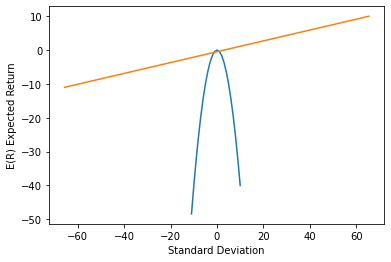

In [24]:
import matplotlib.pyplot as plt

x = np.arange(-11, 11, 1)

w = np.arange(-11, 11, 1)

y=-(0.5*x*x*0.8)
z=3+6.25*w

print('Values of x: ', x)
print('Values of y: ', y)
plt.plot(x, y)
plt.plot(z,w)

plt.xlabel("Standard Deviation")
plt.ylabel("E(R) Expected Return")
plt.show()